# 100 pandas puzzles




## Importing pandas

### Getting started and checking your pandas setup

Difficulty: *easy*

**1.** Import pandas under the alias `pd`.

In [ ]:
import pandas as pd

**2.** Print the version of pandas that has been imported.

In [ ]:
pd.__version__

**3.** Print out all the *version* information of the libraries that are required by the pandas library.

In [ ]:
pd.show_versions()



INSTALLED VERSIONS
------------------
commit                : 0691c5cf90477d3503834d983f69350f250a6ff7
python                : 3.13.1
python-bits           : 64
OS                    : Windows
OS-release            : 11
Version               : 10.0.26100
machine               : AMD64
processor             : AMD64 Family 25 Model 80 Stepping 0, AuthenticAMD
byteorder             : little
LC_ALL                : en_US.UTF-8
LANG                  : en_US.UTF-8
LOCALE                : English_India.1252

pandas                : 2.2.3
numpy                 : 2.2.2
pytz                  : 2025.1
dateutil              : 2.9.0.post0
pip                   : 23.2.1
Cython                : None
sphinx                : None
IPython               : 8.32.0
adbc-driver-postgresql: None
adbc-driver-sqlite    : None
bs4                   : 4.13.3
blosc                 : None
bottleneck            : None
dataframe-api-compat  : None
fastparquet           : None
fsspec                : None
html5lib    

## DataFrame basics

### A few of the fundamental routines for selecting, sorting, adding and aggregating data in DataFrames

Difficulty: *easy*

Note: remember to import numpy using:
```python
import numpy as np
```

Consider the following Python dictionary `data` and Python list `labels`:

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```
(This is just some meaningless data I made up with the theme of animals and trips to a vet.)

**4.** Create a DataFrame `df` from this dictionary `data` which has the index `labels`.

In [ ]:
import numpy as np

data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

df = pd.DataFrame(data, index=labels)

**5.** Display a summary of the basic information about this DataFrame and its data (*hint: there is a single method that can be called on the DataFrame*).

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, a to j
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   animal    10 non-null     object 
 1   age       8 non-null      float64
 2   visits    10 non-null     int64  
 3   priority  10 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 400.0+ bytes


**6.** Return the first 3 rows of the DataFrame `df`.

In [ ]:
df.head(3)

**7.** Select just the 'animal' and 'age' columns from the DataFrame `df`.

In [ ]:
df[['animal', 'age']]

**8.** Select the data in rows `[3, 4, 8]` *and* in columns `['animal', 'age']`.

In [ ]:
df.loc[df.index[[3, 4, 8]], ['animal', 'age']]

**9.** Select only the rows where the number of visits is greater than 3.

In [ ]:
df[df['visits'] > 3]

**10.** Select the rows where the age is missing, i.e. it is `NaN`.

In [ ]:
df[df['age'].isnull()]

**11.** Select the rows where the animal is a cat *and* the age is less than 3.

In [ ]:
df[(df['animal'] == 'cat') & (df['age'] < 3)]

**12.** Select the rows the age is between 2 and 4 (inclusive).

In [ ]:
df[df['age'].between(2, 4)]

**13.** Change the age in row 'f' to 1.5.

In [ ]:
df.loc['f', 'age'] = 1.5

**14.** Calculate the sum of all visits in `df` (i.e. find the total number of visits).

In [ ]:
df['visits'].sum()

**15.** Calculate the mean age for each different animal in `df`.

In [ ]:
df.groupby('animal')['age'].mean()

**16.** Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.

In [ ]:
df.loc['k'] = [5.5, 'dog', 'no', 2]
df = df.drop('k')

**17.** Count the number of each type of animal in `df`.

In [ ]:
df['animal'].value_counts()

**18.** Sort `df` first by the values in the 'age' in *decending* order, then by the value in the 'visits' column in *ascending* order (so row `i` should be first, and row `d` should be last).

In [ ]:
df.sort_values(by=['age', 'visits'], ascending=[False, True])

**19.** The 'priority' column contains the values 'yes' and 'no'. Replace this column with a column of boolean values: 'yes' should be `True` and 'no' should be `False`.

In [ ]:
df['priority'] = df['priority'].map({'yes': True, 'no': False})

**20.** In the 'animal' column, change the 'snake' entries to 'python'.

In [ ]:
df['animal'] = df['animal'].replace('snake', 'python')

**21.** For each animal type and each number of visits, find the mean age. In other words, each row is an animal, each column is a number of visits and the values are the mean ages (*hint: use a pivot table*).

In [ ]:
df.pivot_table(index='animal', columns='visits', values='age', aggfunc='mean')

## DataFrames: beyond the basics

### Slightly trickier: you may need to combine two or more methods to get the right answer

Difficulty: *medium*

The previous section was tour through some basic but essential DataFrame operations. Below are some ways that you might need to cut your data, but for which there is no single "out of the box" method.

**22.** You have a DataFrame `df` with a column 'A' of integers. For example:
```python
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
```

How do you filter out rows which contain the same integer as the row immediately above?

You should be left with a column containing the following values:

```python
1, 2, 3, 4, 5, 6, 7
```

In [ ]:
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})

df.loc[df['A'].shift() != df['A']]
df.drop_duplicates(subset='A')

,A
0,1
1,2
3,3
4,4
5,5
8,6
9,7


**23.** Given a DataFrame of numeric values, say
```python
df = pd.DataFrame(np.random.random(size=(5, 3))) # a 5x3 frame of float values
```

how do you subtract the row mean from each element in the row?

In [ ]:
df = pd.DataFrame(np.random.random(size=(5, 3)))

df.sub(df.mean(axis=1), axis=0)

**24.** Suppose you have DataFrame with 10 columns of real numbers, for example:

```python
df = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))
```
Which column of numbers has the smallest sum?  Return that column's label.

In [ ]:
df = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))

df.sum().idxmin()

**25.** How do you count how many unique rows a DataFrame has (i.e. ignore all rows that are duplicates)? As input, use a DataFrame of zeros and ones with 10 rows and 3 columns.

```python
df = pd.DataFrame(np.random.randint(0, 2, size=(10, 3)))
```

In [ ]:
df = pd.DataFrame(np.random.randint(0, 2, size=(10, 3)))

len(df) - df.duplicated(keep=False).sum()

len(df.drop_duplicates(keep=False))

2

The next three puzzles are slightly harder.


**26.** In the cell below, you have a DataFrame `df` that consists of 10 columns of floating-point numbers. Exactly 5 entries in each row are NaN values.

For each row of the DataFrame, find the *column* which contains the *third* NaN value.

You should return a Series of column labels: `e, c, d, h, d`

In [ ]:
nan = np.nan

data = [[0.04,  nan,  nan, 0.25,  nan, 0.43, 0.71, 0.51,  nan,  nan],
        [ nan,  nan,  nan, 0.04, 0.76,  nan,  nan, 0.67, 0.76, 0.16],
        [ nan,  nan, 0.5 ,  nan, 0.31, 0.4 ,  nan,  nan, 0.24, 0.01],
        [0.49,  nan,  nan, 0.62, 0.73, 0.26, 0.85,  nan,  nan,  nan],
        [ nan,  nan, 0.41,  nan, 0.05,  nan, 0.61,  nan, 0.48, 0.68]]

columns = list('abcdefghij')

df = pd.DataFrame(data, columns=columns)

# write a solution to the question here

**27.** A DataFrame has a column of groups 'grps' and and column of integer values 'vals':

```python
df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'),
                   'vals': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})
```
For each *group*, find the sum of the three greatest values. You should end up with the answer as follows:
```
grps
a    409
b    156
c    345
```

In [ ]:
df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'),
                   'vals': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})

# write a solution to the question here
df.groupby('grps')['vals'].nlargest(3).sum(level=0)

TypeError: sum() got an unexpected keyword argument 'level'

**28.** The DataFrame `df` constructed below has two integer columns 'A' and 'B'. The values in 'A' are between 1 and 100 (inclusive).

For each group of 10 consecutive integers in 'A' (i.e. `(0, 10]`, `(10, 20]`, ...), calculate the sum of the corresponding values in column 'B'.

The answer should be a Series as follows:

```
A
(0, 10]      635
(10, 20]     360
(20, 30]     315
(30, 40]     306
(40, 50]     750
(50, 60]     284
(60, 70]     424
(70, 80]     526
(80, 90]     835
(90, 100]    852
```

In [ ]:
df = pd.DataFrame(np.random.RandomState(8765).randint(1, 101, size=(100, 2)), columns = ["A", "B"])

# write a solution to the question here
df.groupby(pd.cut(df['A'], np.arange(0, 101, 10)))['B'].sum()

C:\Users\siddh\AppData\Local\Temp\ipykernel_17432\1052437750.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(pd.cut(df['A'], np.arange(0, 101, 10)))['B'].sum()


A
(0, 10]      635
(10, 20]     360
(20, 30]     315
(30, 40]     306
(40, 50]     750
(50, 60]     284
(60, 70]     424
(70, 80]     526
(80, 90]     835
(90, 100]    852
Name: B, dtype: int32

## DataFrames: harder problems

### These might require a bit of thinking outside the box...

...but all are solvable using just the usual pandas/NumPy methods (and so avoid using explicit `for` loops).

Difficulty: *hard*

**29.** Consider a DataFrame `df` where there is an integer column 'X':
```python
df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})
```
For each value, count the difference back to the previous zero (or the start of the Series, whichever is closer). These values should therefore be

```
[1, 2, 0, 1, 2, 3, 4, 0, 1, 2]
```

Make this a new column 'Y'.

In [ ]:
df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})

df['Y'] = df.groupby((df['X'] == 0).cumsum()).cumcount()

# We're off by one before we reach the first zero.
first_zero_idx = (df['X'] == 0).idxmax()
df['Y'].iloc[0:first_zero_idx] += 1

**30.** Consider the DataFrame constructed below which contains rows and columns of numerical data.

Create a list of the column-row index locations of the 3 largest values in this DataFrame. In this case, the answer should be:
```
[(5, 7), (6, 4), (2, 5)]
```

In [ ]:
df = pd.DataFrame(np.random.RandomState(30).randint(1, 101, size=(8, 8)))

**31.** You are given the DataFrame below with a column of group IDs, 'grps', and a column of corresponding integer values, 'vals'.

```python
df = pd.DataFrame({"vals": np.random.RandomState(31).randint(-30, 30, size=15),
                   "grps": np.random.RandomState(31).choice(["A", "B"], 15)})
```

Create a new column 'patched_values' which contains the same values as the 'vals' any negative values in 'vals' with the group mean:

```
    vals grps  patched_vals
0    -12    A          13.6
1     -7    B          28.0
2    -14    A          13.6
3      4    A           4.0
4     -7    A          13.6
5     28    B          28.0
6     -2    A          13.6
7     -1    A          13.6
8      8    A           8.0
9     -2    B          28.0
10    28    A          28.0
11    12    A          12.0
12    16    A          16.0
13   -24    A          13.6
14   -12    A          13.6
```

In [ ]:
df = pd.DataFrame({"vals": np.random.RandomState(31).randint(-30, 30, size=15),
                   "grps": np.random.RandomState(31).choice(["A", "B"], 15)})

def replace(group):
    mask = group<0
    group[mask] = group[~mask].mean()
    return group

df.groupby(['grps'])['vals'].transform(replace)

C:\Users\siddh\AppData\Local\Temp\ipykernel_17432\913743978.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '13.6' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  group[mask] = group[~mask].mean()


0     13.6
1     28.0
2     13.6
3      4.0
4     13.6
5     28.0
6     13.6
7     13.6
8      8.0
9     28.0
10    28.0
11    12.0
12    16.0
13    13.6
14    13.6
Name: vals, dtype: float64

**32.** Implement a rolling mean over groups with window size 3, which ignores NaN value. For example consider the following DataFrame:

```python
>>> df = pd.DataFrame({'group': list('aabbabbbabab'),
                       'value': [1, 2, 3, np.nan, 2, 3, np.nan, 1, 7, 3, np.nan, 8]})
>>> df
   group  value
0      a    1.0
1      a    2.0
2      b    3.0
3      b    NaN
4      a    2.0
5      b    3.0
6      b    NaN
7      b    1.0
8      a    7.0
9      b    3.0
10     a    NaN
11     b    8.0
```
The goal is to compute the Series:

```
0     1.000000
1     1.500000
2     3.000000
3     3.000000
4     1.666667
5     3.000000
6     3.000000
7     2.000000
8     3.666667
9     2.000000
10    4.500000
11    4.000000
```
E.g. the first window of size three for group 'b' has values 3.0, NaN and 3.0 and occurs at row index 5. Instead of being NaN the value in the new column at this row index should be 3.0 (just the two non-NaN values are used to compute the mean (3+3)/2)

In [ ]:
df = pd.DataFrame({'group': list('aabbabbbabab'),
                   'value': [1, 2, 3, np.nan, 2, 3, np.nan, 1, 7, 3, np.nan, 8]})

g1 = df.groupby(['group'])['value']              # group values
g2 = df.fillna(0).groupby(['group'])['value']    # fillna, then group values

s = g2.rolling(3, min_periods=1).sum() / g1.rolling(3, min_periods=1).count() # compute means

s.reset_index(level=0, drop=True).sort_index()  # drop/sort index

0     1.000000
1     1.500000
2     3.000000
3     3.000000
4     1.666667
5     3.000000
6     3.000000
7     2.000000
8     3.666667
9     2.000000
10    4.500000
11    4.000000
Name: value, dtype: float64

## Series and DatetimeIndex

### Exercises for creating and manipulating Series with datetime data

Difficulty: *easy/medium*

pandas is fantastic for working with dates and times. These puzzles explore some of this functionality.


**33.** Create a DatetimeIndex that contains each business day of 2015 and use it to index a Series of random numbers. Let's call this Series `s`.

In [ ]:
dti = pd.date_range(start='2015-01-01', end='2015-12-31', freq='B')
s = pd.Series(np.random.rand(len(dti)), index=dti)
s

2015-01-01    0.983125
2015-01-02    0.033522
2015-01-05    0.636474
2015-01-06    0.145716
2015-01-07    0.321162
                ...   
2015-12-25    0.676866
2015-12-28    0.604630
2015-12-29    0.796291
2015-12-30    0.963783
2015-12-31    0.550692
Freq: B, Length: 261, dtype: float64

**34.** Find the sum of the values in `s` for every Wednesday.

In [ ]:
s[s.index.weekday == 2].sum()

**35.** For each calendar month in `s`, find the mean of values.

In [ ]:
s.resample('M').mean()

**36.** For each group of four consecutive calendar months in `s`, find the date on which the highest value occurred.

In [ ]:
s.groupby(pd.Grouper(freq='4M')).idxmax()

**37.** Create a DateTimeIndex consisting of the third Thursday in each month for the years 2015 and 2016.

In [ ]:
pd.date_range('2015-01-01', '2016-12-31', freq='WOM-3THU')

## Cleaning Data

### Making a DataFrame easier to work with

Difficulty: *easy/medium*

It happens all the time: someone gives you data containing malformed strings, Python, lists and missing data. How do you tidy it up so you can get on with the analysis?

Take this monstrosity as the DataFrame to use in the following puzzles:

```python
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm',
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )',
                               '12. Air France', '"Swiss Air"']})
```
Formatted, it looks like this:

```
            From_To  FlightNumber  RecentDelays              Airline
0      LoNDon_paris       10045.0      [23, 47]               KLM(!)
1      MAdrid_miLAN           NaN            []    <Air France> (12)
2  londON_StockhOlm       10065.0  [24, 43, 87]  (British Airways. )
3    Budapest_PaRis           NaN          [13]       12. Air France
4   Brussels_londOn       10085.0      [67, 32]          "Swiss Air"
```


(It's some flight data I made up; it's not meant to be accurate in any way.)


**38.** Some values in the the **FlightNumber** column are missing (they are `NaN`). These numbers are meant to increase by 10 with each row so 10055 and 10075 need to be put in place. Modify `df` to fill in these missing numbers and make the column an integer column (instead of a float column).

In [ ]:
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm',
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )',
                               '12. Air France', '"Swiss Air"']})

df['FlightNumber'] = df['FlightNumber'].interpolate().astype(int)
df

**39.** The **From\_To** column would be better as two separate columns! Split each string on the underscore delimiter `_` to give a new temporary DataFrame called 'temp' with the correct values. Assign the correct column names 'From' and 'To' to this temporary DataFrame.

In [ ]:
temp = df.From_To.str.split('_', expand=True)
temp.columns = ['From', 'To']
temp

**40.** Notice how the capitalisation of the city names is all mixed up in this temporary DataFrame 'temp'. Standardise the strings so that only the first letter is uppercase (e.g. "londON" should become "London".)

In [ ]:
temp['From'] = temp['From'].str.capitalize()
temp['To'] = temp['To'].str.capitalize()
temp

**41.** Delete the **From_To** column from `df` and attach the temporary DataFrame 'temp' from the previous questions.

In [ ]:
df = df.drop('From_To', axis=1)
df = df.join(temp)
df

**42**. In the **Airline** column, you can see some extra puctuation and symbols have appeared around the airline names. Pull out just the airline name. E.g. `'(British Airways. )'` should become `'British Airways'`.

In [ ]:
df['Airline'] = df['Airline'].str.extract('([a-zA-Z\s]+)', expand=False).str.strip()
df

**43**. In the RecentDelays column, the values have been entered into the DataFrame as a list. We would like each first value in its own column, each second value in its own column, and so on. If there isn't an Nth value, the value should be NaN.

Expand the Series of lists into a DataFrame named `delays`, rename the columns `delay_1`, `delay_2`, etc. and replace the unwanted RecentDelays column in `df` with `delays`.

In [ ]:
delays = df['RecentDelays'].apply(pd.Series)

delays.columns = ['delay_{}'.format(n) for n in range(1, len(delays.columns)+1)]

df = df.drop('RecentDelays', axis=1).join(delays)

df

The DataFrame should look much better now.
```
   FlightNumber          Airline      From         To  delay_1  delay_2  delay_3
0         10045              KLM    London      Paris     23.0     47.0      NaN
1         10055       Air France    Madrid      Milan      NaN      NaN      NaN
2         10065  British Airways    London  Stockholm     24.0     43.0     87.0
3         10075       Air France  Budapest      Paris     13.0      NaN      NaN
4         10085        Swiss Air  Brussels     London     67.0     32.0      NaN
```

## Using MultiIndexes

### Go beyond flat DataFrames with additional index levels

Difficulty: *medium*

Previous exercises have seen us analysing data from DataFrames equipped with a single index level. However, pandas also gives you the possibilty of indexing your data using *multiple* levels. This is very much like adding new dimensions to a Series or a DataFrame. For example, a Series is 1D, but by using a MultiIndex with 2 levels we gain of much the same functionality as a 2D DataFrame.

The set of puzzles below explores how you might use multiple index levels to enhance data analysis.

To warm up, we'll look make a Series with two index levels.

**44**. Given the lists `letters = ['A', 'B', 'C']` and `numbers = list(range(10))`, construct a MultiIndex object from the product of the two lists. Use it to index a Series of random numbers. Call this Series `s`.

In [ ]:
letters = ['A', 'B', 'C']
numbers = list(range(10))

mi = pd.MultiIndex.from_product([letters, numbers])
s = pd.Series(np.random.rand(30), index=mi)
s

**45.** Check the index of `s` is lexicographically sorted (this is a necessary proprty for indexing to work correctly with a MultiIndex).

In [ ]:
s.index.is_lexsorted()
s.index.lexsort_depth == s.index.nlevels

**46**. Select the labels `1`, `3` and `6` from the second level of the MultiIndexed Series.

In [ ]:
s.loc[:, [1, 3, 6]]

**47**. Slice the Series `s`; slice up to label 'B' for the first level and from label 5 onwards for the second level.

In [ ]:
s.loc[pd.IndexSlice[:'B', 5:]]
s.loc[slice(None, 'B'), slice(5, None)]

**48**. Sum the values in `s` for each label in the first level (you should have Series giving you a total for labels A, B and C).

In [ ]:
s.sum(level=0)

**49**. Suppose that `sum()` (and other methods) did not accept a `level` keyword argument. How else could you perform the equivalent of `s.sum(level=1)`?

In [ ]:
s.unstack().sum(axis=0)

**50**. Exchange the levels of the MultiIndex so we have an index of the form (letters, numbers). Is this new Series properly lexsorted? If not, sort it.

In [ ]:
new_s = s.swaplevel(0, 1)

if not new_s.index.is_lexsorted():
    new_s = new_s.sort_index()

new_s

## Minesweeper

### Generate the numbers for safe squares in a Minesweeper grid

Difficulty: *medium* to *hard*

If you've ever used an older version of Windows, there's a good chance you've played with Minesweeper:
- https://en.wikipedia.org/wiki/Minesweeper_(video_game)


If you're not familiar with the game, imagine a grid of squares: some of these squares conceal a mine. If you click on a mine, you lose instantly. If you click on a safe square, you reveal a number telling you how many mines are found in the squares that are immediately adjacent. The aim of the game is to uncover all squares in the grid that do not contain a mine.

In this section, we'll make a DataFrame that contains the necessary data for a game of Minesweeper: coordinates of the squares, whether the square contains a mine and the number of mines found on adjacent squares.

**51**. Let's suppose we're playing Minesweeper on a 5 by 4 grid, i.e.
```
X = 5
Y = 4
```
To begin, generate a DataFrame `df` with two columns, `'x'` and `'y'` containing every coordinate for this grid. That is, the DataFrame should start:
```
   x  y
0  0  0
1  0  1
2  0  2
```

In [ ]:
X = 5
Y = 4

p = pd.core.reshape.util.cartesian_product([np.arange(X), np.arange(Y)])
df = pd.DataFrame(np.asarray(p).T, columns=['x', 'y'])
df

**52**. For this DataFrame `df`, create a new column of zeros (safe) and ones (mine). The probability of a mine occuring at each location should be 0.4.

In [ ]:
df['mine'] = np.random.binomial(1, 0.4, X*Y)
df

**53**. Now create a new column for this DataFrame called `'adjacent'`. This column should contain the number of mines found on adjacent squares in the grid.

(E.g. for the first row, which is the entry for the coordinate `(0, 0)`, count how many mines are found on the coordinates `(0, 1)`, `(1, 0)` and `(1, 1)`.)

In [ ]:
df['adjacent'] = \
    df.merge(df + [ 1,  1, 0], on=['x', 'y'], how='left')\
      .merge(df + [ 1, -1, 0], on=['x', 'y'], how='left')\
      .merge(df + [-1,  1, 0], on=['x', 'y'], how='left')\
      .merge(df + [-1, -1, 0], on=['x', 'y'], how='left')\
      .merge(df + [ 1,  0, 0], on=['x', 'y'], how='left')\
      .merge(df + [-1,  0, 0], on=['x', 'y'], how='left')\
      .merge(df + [ 0,  1, 0], on=['x', 'y'], how='left')\
      .merge(df + [ 0, -1, 0], on=['x', 'y'], how='left')\
       .iloc[:, 3:]\
        .sum(axis=1)

from scipy.signal import convolve2d

mine_grid = df.pivot_table(columns='x', index='y', values='mine')
counts = convolve2d(mine_grid.astype(complex), np.ones((3, 3)), mode='same').real.astype(int)
df['adjacent'] = (counts - mine_grid).ravel('F')

**54**. For rows of the DataFrame that contain a mine, set the value in the `'adjacent'` column to NaN.

In [ ]:
df.loc[df['mine'] == 1, 'adjacent'] = np.nan

**55**. Finally, convert the DataFrame to grid of the adjacent mine counts: columns are the `x` coordinate, rows are the `y` coordinate.

In [ ]:
df.drop('mine', axis=1).set_index(['y', 'x']).unstack()

## Plotting

### Visualize trends and patterns in data

Difficulty: *medium*

To really get a good understanding of the data contained in your DataFrame, it is often essential to create plots: if you're lucky, trends and anomalies will jump right out at you. This functionality is baked into pandas and the puzzles below explore some of what's possible with the library.

**56.** Pandas is highly integrated with the plotting library matplotlib, and makes plotting DataFrames very user-friendly! Plotting in a notebook environment usually makes use of the following boilerplate:

```python
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
```

matplotlib is the plotting library which pandas' plotting functionality is built upon, and it is usually aliased to ```plt```.

```%matplotlib inline``` tells the notebook to show plots inline, instead of creating them in a separate window.  

```plt.style.use('ggplot')``` is a style theme that most people find agreeable, based upon the styling of R's ggplot package.

For starters, make a scatter plot of this random data, but use black X's instead of the default markers.

```df = pd.DataFrame({"xs":[1,5,2,8,1], "ys":[4,2,1,9,6]})```

Consult the [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) if you get stuck!

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

df = pd.DataFrame({"xs":[1,5,2,8,1], "ys":[4,2,1,9,6]})

df.plot.scatter("xs", "ys", color = "black", marker = "x")

**57.** Columns in your DataFrame can also be used to modify colors and sizes.  Bill has been keeping track of his performance at work over time, as well as how good he was feeling that day, and whether he had a cup of coffee in the morning.  Make a plot which incorporates all four features of this DataFrame.

(Hint:  If you're having trouble seeing the plot, try multiplying the Series which you choose to represent size by 10 or more)

*The chart doesn't have to be pretty: this isn't a course in data viz!*

```
df = pd.DataFrame({"productivity":[5,2,3,1,4,5,6,7,8,3,4,8,9],
                   "hours_in"    :[1,9,6,5,3,9,2,9,1,7,4,2,2],
                   "happiness"   :[2,1,3,2,3,1,2,3,1,2,2,1,3],
                   "caffienated" :[0,0,1,1,0,0,0,0,1,1,0,1,0]})
```

In [ ]:
df = pd.DataFrame({"productivity":[5,2,3,1,4,5,6,7,8,3,4,8,9],
                   "hours_in"    :[1,9,6,5,3,9,2,9,1,7,4,2,2],
                   "happiness"   :[2,1,3,2,3,1,2,3,1,2,2,1,3],
                   "caffienated" :[0,0,1,1,0,0,0,0,1,1,0,1,0]})

df.plot.scatter("hours_in", "productivity", s = df.happiness * 30, c = df.caffienated)

**58.**  What if we want to plot multiple things?  Pandas allows you to pass in a matplotlib *Axis* object for plots, and plots will also return an Axis object.

Make a bar plot of monthly revenue with a line plot of monthly advertising spending (numbers in millions)

```
df = pd.DataFrame({"revenue":[57,68,63,71,72,90,80,62,59,51,47,52],
                   "advertising":[2.1,1.9,2.7,3.0,3.6,3.2,2.7,2.4,1.8,1.6,1.3,1.9],
                   "month":range(12)
                  })
```

(-1.0, 12.0)

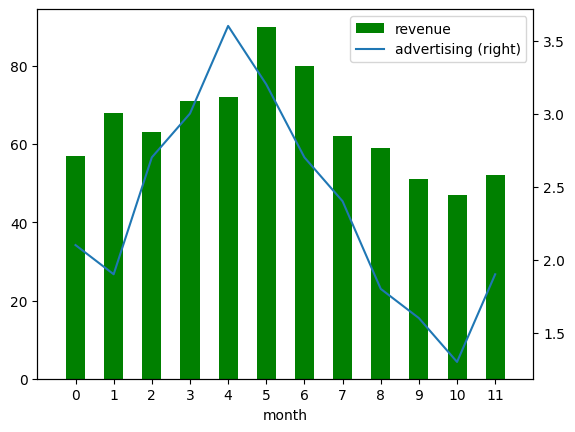

In [ ]:
df = pd.DataFrame({"revenue":[57,68,63,71,72,90,80,62,59,51,47,52],
                   "advertising":[2.1,1.9,2.7,3.0,3.6,3.2,2.7,2.4,1.8,1.6,1.3,1.9],
                   "month":range(12)
                  })

ax = df.plot.bar("month", "revenue", color = "green")
df.plot.line("month", "advertising", secondary_y = True, ax = ax)
ax.set_xlim((-1,12))

Now we're finally ready to create a candlestick chart, which is a very common tool used to analyze stock price data.  A candlestick chart shows the opening, closing, highest, and lowest price for a stock during a time window.  The color of the "candle" (the thick part of the bar) is green if the stock closed above its opening price, or red if below.

![Candlestick Example](img/candle.jpg)

This was initially designed to be a pandas plotting challenge, but it just so happens that this type of plot is just not feasible using pandas' methods.  If you are unfamiliar with matplotlib, we have provided a function that will plot the chart for you so long as you can use pandas to get the data into the correct format.

Your first step should be to get the data in the correct format using pandas' time-series grouping function.  We would like each candle to represent an hour's worth of data.  You can write your own aggregation function which returns the open/high/low/close, but pandas has a built-in which also does this.

The below cell contains helper functions.  Call ```day_stock_data()``` to generate a DataFrame containing the prices a hypothetical stock sold for, and the time the sale occurred.  Call ```plot_candlestick(df)``` on your properly aggregated and formatted stock data to print the candlestick chart.

In [ ]:
import numpy as np
def float_to_time(x):
    return str(int(x)) + ":" + str(int(x%1 * 60)).zfill(2) + ":" + str(int(x*60 % 1 * 60)).zfill(2)

def day_stock_data():
    #NYSE is open from 9:30 to 4:00
    time = 9.5
    price = 100
    results = [(float_to_time(time), price)]
    while time < 16:
        elapsed = np.random.exponential(.001)
        time += elapsed
        if time > 16:
            break
        price_diff = np.random.uniform(.999, 1.001)
        price *= price_diff
        results.append((float_to_time(time), price))


    df = pd.DataFrame(results, columns = ['time','price'])
    df.time = pd.to_datetime(df.time)
    return df

#Don't read me unless you get stuck!
def plot_candlestick(agg):
    """
    agg is a DataFrame which has a DatetimeIndex and five columns: ["open","high","low","close","color"]
    """
    fig, ax = plt.subplots()
    for time in agg.index:
        ax.plot([time.hour] * 2, agg.loc[time, ["high","low"]].values, color = "black")
        ax.plot([time.hour] * 2, agg.loc[time, ["open","close"]].values, color = agg.loc[time, "color"], linewidth = 10)

    ax.set_xlim((8,16))
    ax.set_ylabel("Price")
    ax.set_xlabel("Hour")
    ax.set_title("OHLC of Stock Value During Trading Day")
    plt.show()

**59.** Generate a day's worth of random stock data, and aggregate / reformat it so that it has hourly summaries of the opening, highest, lowest, and closing prices

In [ ]:
df = day_stock_data()
df.head()

In [ ]:
df.set_index("time", inplace = True)
agg = df.resample("H").ohlc()
agg.columns = agg.columns.droplevel()
agg["color"] = (agg.close > agg.open).map({True:"green",False:"red"})
agg.head()

**60.** Now that you have your properly-formatted data, try to plot it yourself as a candlestick chart.  Use the ```plot_candlestick(df)``` function above, or matplotlib's [```plot``` documentation](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.plot.html) if you get stuck.

In [ ]:
plot_candlestick(agg)

# 100 numpy exercises




File automatically generated. See the documentation to update questions/answers/hints programmatically.

Run the `initialize.py` module, then for each question you can query the
answer or an hint with `hint(n)` or `answer(n)` for `n` question number.

In [ ]:
%run initialise.py

#### 1. Import the numpy package under the name `np` (★☆☆)

In [ ]:
import numpy as np

#### 2. Print the numpy version and the configuration (★☆☆)

In [ ]:
np.__version__

'2.2.2'

#### 3. Create a null vector of size 10 (★☆☆)

In [ ]:
null = np.zeros(10)

#### 4. How to find the memory size of any array (★☆☆)

In [ ]:
np.size(null)

10

#### 5. How to get the documentation of the numpy add function from the command line? (★☆☆)

In [ ]:
help(np.add)

Help on ufunc in module numpy:

add = <ufunc 'add'>
    add(x1, x2, /, out=None, *, where=True, casting='same_kind', order='K', dtype=None, subok=True[, signature])

    Add arguments element-wise.

    Parameters
    ----------
    x1, x2 : array_like
        The arrays to be added.
        If ``x1.shape != x2.shape``, they must be broadcastable to a common
        shape (which becomes the shape of the output).
    out : ndarray, None, or tuple of ndarray and None, optional
        A location into which the result is stored. If provided, it must have
        a shape that the inputs broadcast to. If not provided or None,
        a freshly-allocated array is returned. A tuple (possible only as a
        keyword argument) must have length equal to the number of outputs.
    where : array_like, optional
        This condition is broadcast over the input. At locations where the
        condition is True, the `out` array will be set to the ufunc result.
        Elsewhere, the `out` array wi

#### 6. Create a null vector of size 10 but the fifth value which is 1 (★☆☆)

In [ ]:
null=np.zeros(10)
null[4]=1
print(null)

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


#### 7. Create a vector with values ranging from 10 to 49 (★☆☆)

In [ ]:
z=np.arange(10,50)
print(z)

[10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33
 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49]


#### 8. Reverse a vector (first element becomes last) (★☆☆)

In [ ]:
s=np.transpose(z)
print(s)

[10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33
 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49]


#### 9. Create a 3x3 matrix with values ranging from 0 to 8 (★☆☆)

In [ ]:
A=np.arange(9).reshape(3,3)
print(A)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


#### 10. Find indices of non-zero elements from [1,2,0,0,4,0] (★☆☆)

In [ ]:
A=np.array([1,2,0,0,4,0])
np.nonzero(A)

(array([0, 1, 4]),)

#### 11. Create a 3x3 identity matrix (★☆☆)

In [ ]:
z=np.arange(0,9).reshape(3,3)
print(z)


[[0 1 2]
 [3 4 5]
 [6 7 8]]


#### 12. Create a 3x3x3 array with random values (★☆☆)

In [ ]:
np.random.random((3,3,3))

array([[[0.77627816, 0.23011857, 0.41573858],
        [0.43146814, 0.3841022 , 0.30993429],
        [0.28406008, 0.46524066, 0.72185711]],

       [[0.47308888, 0.9948281 , 0.38265381],
        [0.86456539, 0.60548752, 0.76264484],
        [0.40534864, 0.86900612, 0.40299785]],

       [[0.43069144, 0.01985576, 0.52239437],
        [0.77653712, 0.76317172, 0.94248119],
        [0.10958228, 0.83734322, 0.8403444 ]]])

#### 13. Create a 10x10 array with random values and find the minimum and maximum values (★☆☆)

In [ ]:
z=np.random.random((10,10))
print(z)
print(z.max())
print(z.min())

#### 14. Create a random vector of size 30 and find the mean value (★☆☆)

In [ ]:
z=np.random.random(size=(30))
print(z)
print (np.mean(z))

#### 15. Create a 2d array with 1 on the border and 0 inside (★☆☆)

In [ ]:
d=np.zeros((4,4),dtype=np.int64 )
print(d)




[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


#### 16. How to add a border (filled with 0's) around an existing array? (★☆☆)

In [ ]:
Z = np.ones((5,5))
Z = np.pad(Z, pad_width=1, mode='constant', constant_values=0)
print(Z)

[[0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]


#### 17. What is the result of the following expression? (★☆☆)
```python
0 * np.nan
np.nan == np.nan
np.inf > np.nan
np.nan - np.nan
np.nan in set([np.nan])
0.3 == 3 * 0.1
```

In [ ]:
False

#### 18. Create a 5x5 matrix with values 1,2,3,4 just below the diagonal (★☆☆)

In [ ]:
z=np.zeros((5,5))
value=np.array([1,2,3,4,5])
np.fill_diagonal(z[1:],value)
print(z)

#### 19. Create a 8x8 matrix and fill it with a checkerboard pattern (★☆☆)

In [ ]:

matrix = np.zeros((8, 8))

matrix[1::2, ::2] = 1  # Fill every second row starting from row 1, column 0
matrix[::2, 1::2] = 1  # Fill every second column starting from column 1, row 0

print(matrix)


#### 20. Consider a (6,7,8) shape array, what is the index (x,y,z) of the 100th element? (★☆☆)

In [ ]:
arr = np.arange(6 * 7 * 8).reshape(6, 7, 8)

# Find the 100th element (index 99 since indexing starts from 0)
index = np.unravel_index(99, arr.shape)

print("Index of the 100th element:", index)

Index of the 100th element: (np.int64(1), np.int64(5), np.int64(3))


#### 21. Create a checkerboard 8x8 matrix using the tile function (★☆☆)

In [ ]:
np.tile(np.array([[0, 1], [1, 0]]), (4, 4))

array([[0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0]])

#### 22. Normalize a 5x5 random matrix (★☆☆)

In [ ]:
np.random.random((5,5))

[1 0]


#### 23. Create a custom dtype that describes a color as four unsigned bytes (RGBA) (★☆☆)

In [ ]:
np.dtype([('r', np.ubyte), ('g', np.ubyte), ('b', np.ubyte), ('a', np.ubyte)])

dtype([('r', 'u1'), ('g', 'u1'), ('b', 'u1'), ('a', 'u1')])

#### 24. Multiply a 5x3 matrix by a 3x2 matrix (real matrix product) (★☆☆)

In [ ]:
a=np.array([5,3])
b=np.array([3,2])
print(np.matmul(a,b))

21


#### 25. Given a 1D array, negate all elements which are between 3 and 8, in place. (★☆☆)

In [ ]:

arr = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Negate elements between 3 and 8 (inclusive) in place
arr[(arr >= 3) & (arr <= 8)] *= -1

print(arr)


[ 1  2 -3 -4 -5 -6 -7 -8  9 10]


#### 26. What is the output of the following script? (★☆☆)
```python
# Author: Jake VanderPlas

print(sum(range(5),-1))
from numpy import *
print(sum(range(5),-1))
```

In [ ]:
9
10

10

#### 27. Consider an integer vector Z, which of these expressions are legal? (★☆☆)
```python
Z**Z
2 << Z >> 2
Z <- Z
1j*Z
Z/1/1
Z<Z>Z
```

#### 28. What are the result of the following expressions? (★☆☆)
```python
np.array(0) / np.array(0)
np.array(0) // np.array(0)
np.array([np.nan]).astype(int).astype(float)
```

In [ ]:
array([-9.22337204e+18])



#### 29. How to round away from zero a float array ? (★☆☆)

In [ ]:
rounded_arr = np.copysign(np.ceil(np.abs(arr)), arr)

#### 30. How to find common values between two arrays? (★☆☆)

In [ ]:
z=np.array([1,2,3,4,5])
c=np.array([1,2,3,7,8])
common_values=np.intersect1d( z,c)
print(common_values)

[1 2 3]


#### 31. How to ignore all numpy warnings (not recommended)? (★☆☆)

In [ ]:
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)

#### 32. Is the following expressions true? (★☆☆)
```python
np.sqrt(-1) == np.emath.sqrt(-1)
```

In [ ]:
false

#### 33. How to get the dates of yesterday, today and tomorrow? (★☆☆)

In [ ]:
import datetime
datetime.date.today()


datetime.date(2025, 2, 28)

#### 34. How to get all the dates corresponding to the month of July 2016? (★★☆)

In [ ]:
Z = np.arange('2016-07', '2016-08', dtype='datetime64[D]')
print(Z)

['2016-07-01' '2016-07-02' '2016-07-03' '2016-07-04' '2016-07-05'
 '2016-07-06' '2016-07-07' '2016-07-08' '2016-07-09' '2016-07-10'
 '2016-07-11' '2016-07-12' '2016-07-13' '2016-07-14' '2016-07-15'
 '2016-07-16' '2016-07-17' '2016-07-18' '2016-07-19' '2016-07-20'
 '2016-07-21' '2016-07-22' '2016-07-23' '2016-07-24' '2016-07-25'
 '2016-07-26' '2016-07-27' '2016-07-28' '2016-07-29' '2016-07-30'
 '2016-07-31']


#### 35. How to compute ((A+B)*(-A/2)) in place (without copy)? (★★☆)

In [ ]:
A = np.ones(3)*1
B = np.ones(3)*2
np.add(A,B,out=B)
np.divide(A,2,out=A)
np.negative(A,out=A)
np.multiply(A,B,out=A)

array([-1.5, -1.5, -1.5])

#### 36. Extract the integer part of a random array of positive numbers using 4 different methods (★★☆)

In [ ]:
Z = np.random.uniform((0,10,10))
print(Z - Z%1)
print(Z // 1)
print(np.floor(Z))
print(Z.astype(int))
print(np.trunc(Z))

[0. 8. 6.]
[0. 8. 6.]
[0. 8. 6.]
[0 8 6]
[0. 8. 6.]


#### 37. Create a 5x5 matrix with row values ranging from 0 to 4 (★★☆)

In [ ]:
row = np.arange(5)

# Tile the row array to create a 5x5 matrix
matrix = np.tile(row, (5, 1))

print(matrix)

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]


#### 38. Consider a generator function that generates 10 integers and use it to build an array (★☆☆)

In [ ]:
def generate():
    for x in range(10):
        yield x
Z = np.fromiter(generate(),dtype=float,count=-1)
print(Z)


[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


#### 39. Create a vector of size 10 with values ranging from 0 to 1, both excluded (★★☆)

In [ ]:
Z = np.linspace(0,1,11,endpoint=False)[1:]
print(Z)

[0.09090909 0.18181818 0.27272727 0.36363636 0.45454545 0.54545455
 0.63636364 0.72727273 0.81818182 0.90909091]


#### 40. Create a random vector of size 10 and sort it (★★☆)

In [ ]:
arr=np.random.random(10)
arr.sort()
print(arr)

[0.04002234 0.11723232 0.2338603  0.25131695 0.42853432 0.55390727
 0.57856241 0.71553867 0.85828893 0.89135594]


#### 41. How to sum a small array faster than np.sum? (★★☆)

In [ ]:
arr = np.array([1, 2, 3, 4, 5])

# Sum using Python's built-in sum() function
result = np.sum(arr)

print(result)

15


#### 42. Consider two random array A and B, check if they are equal (★★☆)

In [ ]:
Z = np.linspace(0,1,11,endpoint=False)[1:]
print(Z)
equal = np.allclose(A,B)
print(equal)
equal = np.array_equal(A,B)
print(equal)

[0.09090909 0.18181818 0.27272727 0.36363636 0.45454545 0.54545455
 0.63636364 0.72727273 0.81818182 0.90909091]
False
False


#### 43. Make an array immutable (read-only) (★★☆)

In [ ]:
arr = np.array([1, 2, 3, 4, 5])

# Make the array immutable (read-only)
arr.flags.writeable = False

# Try modifying the array (will raise an error)
try:
    arr[0] = 10  # Attempting to modify the array
except ValueError as e:
    print(f"Error: {e}")

Error: assignment destination is read-only


#### 44. Consider a random 10x2 matrix representing cartesian coordinates, convert them to polar coordinates (★★☆)

In [ ]:
Z = np.random.random((10,2))
X,Y = Z[:,0], Z[:,1]
R = np.sqrt(X**2+Y**2)
T = np.arctan2(Y,X)
print(R)
print(T)

[0.39036329 1.021543   0.69305627 0.81387648 0.95526665 1.12347774
 0.86484219 0.77878287 0.96579036 0.65017191]
[0.15453033 1.0491917  0.85214116 1.45789699 1.30636638 0.99641605
 0.13089941 0.50533971 0.55277646 0.78511618]


#### 45. Create random vector of size 10 and replace the maximum value by 0 (★★☆)

In [ ]:
Z = np.random.random(10)
Z[Z.argmax()] = 0
print(Z)


[0.72812461 0.16115243 0.31603328 0.         0.30146627 0.44931896
 0.84662491 0.14771536 0.13572103 0.85541618]


#### 46. Create a structured array with `x` and `y` coordinates covering the [0,1]x[0,1] area (★★☆)

In [ ]:
Z = np.zeros((5,5), [('x',float),('y',float)])
Z['x'], Z['y'] = np.meshgrid(np.linspace(0,1,5),
                             np.linspace(0,1,5))
print(Z)

[[(0.  , 0.  ) (0.25, 0.  ) (0.5 , 0.  ) (0.75, 0.  ) (1.  , 0.  )]
 [(0.  , 0.25) (0.25, 0.25) (0.5 , 0.25) (0.75, 0.25) (1.  , 0.25)]
 [(0.  , 0.5 ) (0.25, 0.5 ) (0.5 , 0.5 ) (0.75, 0.5 ) (1.  , 0.5 )]
 [(0.  , 0.75) (0.25, 0.75) (0.5 , 0.75) (0.75, 0.75) (1.  , 0.75)]
 [(0.  , 1.  ) (0.25, 1.  ) (0.5 , 1.  ) (0.75, 1.  ) (1.  , 1.  )]]


#### 47. Given two arrays, X and Y, construct the Cauchy matrix C (Cij =1/(xi - yj)) (★★☆)

In [ ]:
X = np.arange(8)
Y = X + 0.5
C = 1.0 / np.subtract.outer(X, Y)
print(np.linalg.det(C))

3638.163637117973


#### 48. Print the minimum and maximum representable value for each numpy scalar type (★★☆)

In [ ]:
for dtype in [np.int8, np.int32, np.int64]:
   print(np.iinfo(dtype).min)
   print(np.iinfo(dtype).max)
for dtype in [np.float32, np.float64]:
   print(np.finfo(dtype).min)
   print(np.finfo(dtype).max)
   print(np.finfo(dtype).eps)

-128
127
-2147483648
2147483647
-9223372036854775808
9223372036854775807
-3.4028235e+38
3.4028235e+38
1.1920929e-07
-1.7976931348623157e+308
1.7976931348623157e+308
2.220446049250313e-16


#### 49. How to print all the values of an array? (★★☆)

In [ ]:
np.set_printoptions(threshold=float("inf"))
Z = np.zeros((40,40))
print(Z)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


#### 50. How to find the closest value (to a given scalar) in a vector? (★★☆)

In [ ]:
Z = np.arange(100)
v = np.random.uniform(0,100)
index = (np.abs(Z-v)).argmin()
print(Z[index])

60


#### 51. Create a structured array representing a position (x,y) and a color (r,g,b) (★★☆)

In [ ]:
Z = np.zeros(10, [ ('position', [ ('x', float, 1),
                                  ('y', float, 1)]),
                   ('color',    [ ('r', float, 1),
                                  ('g', float, 1),
                                  ('b', float, 1)])])
print(Z)

[(([0.], [0.]), ([0.], [0.], [0.])) (([0.], [0.]), ([0.], [0.], [0.]))
 (([0.], [0.]), ([0.], [0.], [0.])) (([0.], [0.]), ([0.], [0.], [0.]))
 (([0.], [0.]), ([0.], [0.], [0.])) (([0.], [0.]), ([0.], [0.], [0.]))
 (([0.], [0.]), ([0.], [0.], [0.])) (([0.], [0.]), ([0.], [0.], [0.]))
 (([0.], [0.]), ([0.], [0.], [0.])) (([0.], [0.]), ([0.], [0.], [0.]))]


#### 52. Consider a random vector with shape (100,2) representing coordinates, find point by point distances (★★☆)

In [ ]:
Z = np.random.random((10,2))
X,Y = np.atleast_2d(Z[:,0], Z[:,1])
D = np.sqrt( (X-X.T)**2 + (Y-Y.T)**2)
print(D)

# Much faster with scipy
import scipy
# Thanks Gavin Heverly-Coulson (#issue 1)
import scipy.spatial

Z = np.random.random((10,2))
D = scipy.spatial.distance.cdist(Z,Z)
print(D)

NameError: name 'np' is not defined

#### 53. How to convert a float (32 bits) array into an integer (32 bits) in place?

In [ ]:
Z = (np.random.rand(10)*100).astype(np.float32)
Y = Z.view(np.int32)
Y[:] = Z
print(Y)

[80 14 28 15  2 27 71  4 85 47]


#### 54. How to read the following file? (★★☆)
```
1, 2, 3, 4, 5
6,  ,  , 7, 8
 ,  , 9,10,11
```

In [ ]:
from io import StringIO

# Fake file
s = StringIO('''1, 2, 3, 4, 5

                6,  ,  , 7, 8

                 ,  , 9,10,11
''')
Z = np.genfromtxt(s, delimiter=",", dtype=np.int)
print(Z)

#### 55. What is the equivalent of enumerate for numpy arrays? (★★☆)

In [ ]:
Z = np.arange(9).reshape(3,3)
for index, value in np.ndenumerate(Z):
    print(index, value)
for index in np.ndindex(Z.shape):
    print(index, Z[index])

(0, 0) 0
(0, 1) 1
(0, 2) 2
(1, 0) 3
(1, 1) 4
(1, 2) 5
(2, 0) 6
(2, 1) 7
(2, 2) 8
(0, 0) 0
(0, 1) 1
(0, 2) 2
(1, 0) 3
(1, 1) 4
(1, 2) 5
(2, 0) 6
(2, 1) 7
(2, 2) 8


#### 56. Generate a generic 2D Gaussian-like array (★★☆)

In [ ]:
X, Y = np.meshgrid(np.linspace(-1,1,10), np.linspace(-1,1,10))
D = np.sqrt(X*X+Y*Y)
sigma, mu = 1.0, 0.0
G = np.exp(-( (D-mu)**2 / ( 2.0 * sigma**2 ) ) )
print(G)

[[0.36787944 0.44822088 0.51979489 0.57375342 0.60279818 0.60279818
  0.57375342 0.51979489 0.44822088 0.36787944]
 [0.44822088 0.54610814 0.63331324 0.69905581 0.73444367 0.73444367
  0.69905581 0.63331324 0.54610814 0.44822088]
 [0.51979489 0.63331324 0.73444367 0.81068432 0.85172308 0.85172308
  0.81068432 0.73444367 0.63331324 0.51979489]
 [0.57375342 0.69905581 0.81068432 0.89483932 0.9401382  0.9401382
  0.89483932 0.81068432 0.69905581 0.57375342]
 [0.60279818 0.73444367 0.85172308 0.9401382  0.98773022 0.98773022
  0.9401382  0.85172308 0.73444367 0.60279818]
 [0.60279818 0.73444367 0.85172308 0.9401382  0.98773022 0.98773022
  0.9401382  0.85172308 0.73444367 0.60279818]
 [0.57375342 0.69905581 0.81068432 0.89483932 0.9401382  0.9401382
  0.89483932 0.81068432 0.69905581 0.57375342]
 [0.51979489 0.63331324 0.73444367 0.81068432 0.85172308 0.85172308
  0.81068432 0.73444367 0.63331324 0.51979489]
 [0.44822088 0.54610814 0.63331324 0.69905581 0.73444367 0.73444367
  0.69905581 0

#### 57. How to randomly place p elements in a 2D array? (★★☆)

In [ ]:
n = 10
p = 3
Z = np.zeros((n,n))
np.put(Z, np.random.choice(range(n*n), p, replace=False),1)
print(Z)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


#### 58. Subtract the mean of each row of a matrix (★★☆)

In [ ]:
X = np.random.rand(5, 10)

# Recent versions of numpy
Y = X - X.mean(axis=1, keepdims=True)

# Older versions of numpy
Y = X - X.mean(axis=1).reshape(-1, 1)

print(Y)

[[ 0.29337439  0.1828153   0.35391744 -0.3419837   0.12608325 -0.19661438
  -0.20192209 -0.25209841  0.02335419  0.01307401]
 [ 0.15725922 -0.09111705 -0.0481926   0.2836897  -0.14198664  0.1378745
  -0.36066093  0.04084337  0.10185015 -0.07955972]
 [-0.33320335 -0.28602293  0.39018668 -0.14849428 -0.37209926 -0.11453402
   0.34613309  0.23226255  0.36087605 -0.07510452]
 [ 0.34833939  0.29343791 -0.45616616 -0.20426426 -0.09600671 -0.53547967
   0.05861136  0.03591388  0.25906092  0.29655335]
 [ 0.00940955  0.19910349 -0.21674477  0.02422238 -0.10635129 -0.36259314
   0.49491179  0.47649    -0.35446416 -0.16398385]]


#### 59. How to sort an array by the nth column? (★★☆)

In [ ]:

Z = np.random.randint(0,10,(3,3))
print(Z)
print(Z[Z[:,1].argsort()])

[[5 9 1]
 [4 6 5]
 [9 6 9]]
[[4 6 5]
 [9 6 9]
 [5 9 1]]


#### 60. How to tell if a given 2D array has null columns? (★★☆)

In [ ]:
Z = np.random.randint(0,3,(3,10))
print((~Z.any(axis=0)).any())

# null : np.nan
Z=np.array([
    [0,1,np.nan],
    [1,2,np.nan],
    [4,5,np.nan]
])
print(np.isnan(Z).all(axis=0))

False
[False False  True]


#### 61. Find the nearest value from a given value in an array (★★☆)

In [ ]:
Z = np.random.uniform(0,1,10)
z = 0.5
m = Z.flat[np.abs(Z - z).argmin()]
print(m)

0.7218716622855623


#### 62. Considering two arrays with shape (1,3) and (3,1), how to compute their sum using an iterator? (★★☆)

In [ ]:
A = np.arange(3).reshape(3,1)
B = np.arange(3).reshape(1,3)
it = np.nditer([A,B,None])
for x,y,z in it: z[...] = x + y
print(it.operands[2])

[[0 1 2]
 [1 2 3]
 [2 3 4]]


#### 63. Create an array class that has a name attribute (★★☆)

In [ ]:
class NamedArray(np.ndarray):
    def __new__(cls, array, name="no name"):
        obj = np.asarray(array).view(cls)
        obj.name = name
        return obj
    def __array_finalize__(self, obj):
        if obj is None: return
        self.name = getattr(obj, 'name', "no name")

Z = NamedArray(np.arange(10), "range_10")
print (Z.name)

range_10


#### 64. Consider a given vector, how to add 1 to each element indexed by a second vector (be careful with repeated indices)? (★★★)

In [ ]:
Z = np.ones(10)
I = np.random.randint(0,len(Z),20)
Z += np.bincount(I, minlength=len(Z))
print(Z)

[2. 3. 7. 2. 2. 3. 4. 3. 2. 2.]


#### 65. How to accumulate elements of a vector (X) to an array (F) based on an index list (I)? (★★★)

In [ ]:
X = [1,2,3,4,5,6]
I = [1,3,9,3,4,1]
F = np.bincount(I,X)
print(F)

[0. 7. 0. 6. 5. 0. 0. 0. 0. 3.]


#### 66. Considering a (w,h,3) image of (dtype=ubyte), compute the number of unique colors (★★☆)

In [ ]:
w, h = 256, 256
I = np.random.randint(0, 4, (h, w, 3)).astype(np.ubyte)
colors = np.unique(I.reshape(-1, 3), axis=0)
n = len(colors)
print(n)

# Faster version
# Author: Mark Setchell
# https://stackoverflow.com/a/59671950/2836621

w, h = 256, 256
I = np.random.randint(0,4,(h,w,3), dtype=np.uint8)

# View each pixel as a single 24-bit integer, rather than three 8-bit bytes
I24 = np.dot(I.astype(np.uint32),[1,256,65536])

# Count unique colours
n = len(np.unique(I24))
print(n)

64
64


#### 67. Considering a four dimensions array, how to get sum over the last two axis at once? (★★★)

In [ ]:
A = np.random.randint(0,10,(3,4,3,4))
# solution by passing a tuple of axes (introduced in numpy 1.7.0)
sum = A.sum(axis=(-2,-1))
print(sum)
# solution by flattening the last two dimensions into one
# (useful for functions that don't accept tuples for axis argument)
sum = A.reshape(A.shape[:-2] + (-1,)).sum(axis=-1)
print(sum)

[[67 59 52 63]
 [50 62 52 56]
 [51 60 62 53]]
[[67 59 52 63]
 [50 62 52 56]
 [51 60 62 53]]


#### 68. Considering a one-dimensional vector D, how to compute means of subsets of D using a vector S of same size describing subset  indices? (★★★)

In [ ]:
D = np.random.uniform(0,1,100)
S = np.random.randint(0,10,100)
D_sums = np.bincount(S, weights=D)
D_counts = np.bincount(S)
D_means = D_sums / D_counts
print(D_means)

# Pandas solution as a reference due to more intuitive code
import pandas as pd
print(pd.Series(D).groupby(S).mean())

[0.37423377 0.47175285 0.5136165  0.4964769  0.14851345 0.43026063
 0.52214032 0.45858148 0.22548089 0.5848958 ]
0    0.374234
1    0.471753
2    0.513617
3    0.496477
4    0.148513
5    0.430261
6    0.522140
7    0.458581
8    0.225481
9    0.584896
dtype: float64


#### 69. How to get the diagonal of a dot product? (★★★)

In [ ]:
A = np.random.uniform(0,1,(5,5))
B = np.random.uniform(0,1,(5,5))

# Slow version
np.diag(np.dot(A, B))

# Fast version
np.sum(A * B.T, axis=1)

# Faster version
np.einsum("ij,ji->i", A, B)

array([0.33479606, 2.05247528, 2.22141956, 1.97646573, 0.72383087])

#### 70. Consider the vector [1, 2, 3, 4, 5], how to build a new vector with 3 consecutive zeros interleaved between each value? (★★★)

In [ ]:
Z = np.array([1,2,3,4,5])
nz = 3
Z0 = np.zeros(len(Z) + (len(Z)-1)*(nz))
Z0[::nz+1] = Z
print(Z0)


[1. 0. 0. 0. 2. 0. 0. 0. 3. 0. 0. 0. 4. 0. 0. 0. 5.]


#### 71. Consider an array of dimension (5,5,3), how to mulitply it by an array with dimensions (5,5)? (★★★)

In [ ]:
A = np.ones((5,5,3))
B = 2*np.ones((5,5))
print(A * B[:,:,None])

[[[2. 2. 2.]
  [2. 2. 2.]
  [2. 2. 2.]
  [2. 2. 2.]
  [2. 2. 2.]]

 [[2. 2. 2.]
  [2. 2. 2.]
  [2. 2. 2.]
  [2. 2. 2.]
  [2. 2. 2.]]

 [[2. 2. 2.]
  [2. 2. 2.]
  [2. 2. 2.]
  [2. 2. 2.]
  [2. 2. 2.]]

 [[2. 2. 2.]
  [2. 2. 2.]
  [2. 2. 2.]
  [2. 2. 2.]
  [2. 2. 2.]]

 [[2. 2. 2.]
  [2. 2. 2.]
  [2. 2. 2.]
  [2. 2. 2.]
  [2. 2. 2.]]]


#### 72. How to swap two rows of an array? (★★★)

In [ ]:
A = np.arange(25).reshape(5,5)
A[[0,1]] = A[[1,0]]
print(A)

[[ 5  6  7  8  9]
 [ 0  1  2  3  4]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]


#### 73. Consider a set of 10 triplets describing 10 triangles (with shared vertices), find the set of unique line segments composing all the  triangles (★★★)

In [ ]:
faces = np.random.randint(0,100,(10,3))
F = np.roll(faces.repeat(2,axis=1),-1,axis=1)
F = F.reshape(len(F)*3,2)
F = np.sort(F,axis=1)
G = F.view( dtype=[('p0',F.dtype),('p1',F.dtype)] )
G = np.unique(G)
print(G)

[( 8, 16) ( 8, 22) (13, 59) (13, 97) (15, 22) (15, 72) (16, 22) (18, 80)
 (18, 91) (22, 72) (28, 37) (28, 38) (33, 38) (33, 95) (35, 37) (35, 47)
 (37, 38) (37, 47) (38, 95) (39, 55) (39, 57) (49, 78) (49, 99) (51, 78)
 (51, 85) (55, 57) (59, 97) (78, 85) (78, 99) (80, 91)]


#### 74. Given a sorted array C that corresponds to a bincount, how to produce an array A such that np.bincount(A) == C? (★★★)

In [ ]:
C = np.bincount([1,1,2,3,4,4,6])
A = np.repeat(np.arange(len(C)), C)
print(A)

[1 1 2 3 4 4 6]


#### 75. How to compute averages using a sliding window over an array? (★★★)

In [ ]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n
Z = np.arange(20)
print(moving_average(Z, n=3))

# Author: Jeff Luo (@Jeff1999)
# make sure your NumPy >= 1.20.0

from numpy.lib.stride_tricks import sliding_window_view

Z = np.arange(20)
print(sliding_window_view(Z, window_shape=3).mean(axis=-1))

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.]


#### 76. Consider a one-dimensional array Z, build a two-dimensional array whose first row is (Z[0],Z[1],Z[2]) and each subsequent row is  shifted by 1 (last row should be (Z[-3],Z[-2],Z[-1]) (★★★)

In [ ]:
from numpy.lib import stride_tricks

def rolling(a, window):
    shape = (a.size - window + 1, window)
    strides = (a.strides[0], a.strides[0])
    return stride_tricks.as_strided(a, shape=shape, strides=strides)
Z = rolling(np.arange(10), 3)
print(Z)

# Author: Jeff Luo (@Jeff1999)

Z = np.arange(10)
print(sliding_window_view(Z, window_shape=3))

[[0 1 2]
 [1 2 3]
 [2 3 4]
 [3 4 5]
 [4 5 6]
 [5 6 7]
 [6 7 8]
 [7 8 9]]
[[0 1 2]
 [1 2 3]
 [2 3 4]
 [3 4 5]
 [4 5 6]
 [5 6 7]
 [6 7 8]
 [7 8 9]]


#### 77. How to negate a boolean, or to change the sign of a float inplace? (★★★)

In [ ]:
Z = np.random.randint(0,2,100)
np.logical_not(Z, out=Z)

Z = np.random.uniform(-1.0,1.0,100)
np.negative(Z, out=Z)

array([-0.8296434 , -0.4443432 ,  0.27860426, -0.6268775 ,  0.69702145,
        0.5415754 , -0.20237723,  0.55198728,  0.85807918, -0.14401358,
        0.07376702,  0.28585378, -0.82348341,  0.42437441,  0.11208062,
        0.75766908,  0.78060111, -0.5403176 , -0.65517841,  0.83230977,
        0.83384701, -0.79135134, -0.57795956, -0.04312645,  0.52890848,
       -0.9882802 ,  0.64765681, -0.19514805,  0.8512622 , -0.82147677,
        0.36606909, -0.35810756,  0.07874766,  0.1033619 , -0.2572585 ,
       -0.29208092,  0.75479316, -0.55350671, -0.98294159, -0.28327546,
       -0.04231401, -0.59142351,  0.27655781, -0.71476117, -0.09251351,
       -0.61507995,  0.28602854,  0.45940139, -0.41095737, -0.74099981,
       -0.75907303, -0.99804014, -0.07367989, -0.35903862, -0.11564271,
        0.56270338,  0.27524937,  0.00158637, -0.24052961, -0.5039693 ,
        0.78042308,  0.78792834, -0.24770955,  0.20882169, -0.6569199 ,
       -0.12550084,  0.18055941, -0.09876134,  0.19742336,  0.45

#### 78. Consider 2 sets of points P0,P1 describing lines (2d) and a point p, how to compute distance from p to each line i (P0[i],P1[i])? (★★★)

In [ ]:
def distance(P0, P1, p):
    T = P1 - P0
    L = (T**2).sum(axis=1)
    U = -((P0[:,0]-p[...,0])*T[:,0] + (P0[:,1]-p[...,1])*T[:,1]) / L
    U = U.reshape(len(U),1)
    D = P0 + U*T - p
    return np.sqrt((D**2).sum(axis=1))

P0 = np.random.uniform(-10,10,(10,2))
P1 = np.random.uniform(-10,10,(10,2))
p  = np.random.uniform(-10,10,( 1,2))
print(distance(P0, P1, p))

[16.00335092 16.22975849  9.0862388   6.01135954 11.27621379  7.03142107
  9.15117416  7.73040167 15.74605393  7.37314171]


#### 79. Consider 2 sets of points P0,P1 describing lines (2d) and a set of points P, how to compute distance from each point j (P[j]) to each line i (P0[i],P1[i])? (★★★)

In [ ]:
P0 = np.random.uniform(-10, 10, (10,2))
P1 = np.random.uniform(-10,10,(10,2))
p = np.random.uniform(-10, 10, (10,2))
print(np.array([distance(P0,P1,p_i) for p_i in p]))

# Author: Yang Wu (Broadcasting)
def distance_points_to_lines(p: np.ndarray, p_1: np.ndarray, p_2: np.ndarray) -> np.ndarray:
    x_0, y_0 = p.T  # Shape -> (n points, )
    x_1, y_1 = p_1.T  # Shape -> (n lines, )
    x_2, y_2 = p_2.T  # Shape -> (n lines, )

    # Displacement vector coordinates from p_1 -> p_2
    dx = x_2 - x_1  # Shape -> (n lines, )
    dy = y_2 - y_1  # Shape -> (n lines, )

    # The 'cross product' term
    cross_term = x_2 * y_1 - y_2 * x_1  # Shape -> (n lines, )

    # Broadcast x_0, y_0 (n points, 1) and dx, dy, cross_term (1, n lines) -> (n points, n lines)
    numerator = np.abs(
        dy[np.newaxis, :] * x_0[:, np.newaxis]
        - dx[np.newaxis, :] * y_0[:, np.newaxis]
        + cross_term[np.newaxis, :]
    )
    denominator = np.sqrt(dx**2 + dy**2)  # Shape -> (n lines, )
     # Shape (n points, n lines) / (1, n_lines) -> (n points, n lines)
    return numerator / denominator[np.newaxis, :]

distance_points_to_lines(p, P0, P1)

[[ 3.86223766  8.94063558  5.06379771  4.85548916  2.76928631  0.59819254
   2.96464283  1.96576378  8.5740764   0.42948423]
 [ 3.06573768  3.42485274 18.21828545  6.51200316  5.2818467   2.53841903
   9.02535915 11.06146575  2.32323107 10.03057826]
 [ 9.39517708 10.53514535  0.91858607  9.66955901  0.80606906  5.20679225
   8.54902214  4.7424108   5.6376048   6.60376096]
 [ 2.62364281  8.65796258  8.28134053  1.09485025  6.16005078  7.25857987
   2.11924551  0.36161283 12.88869368  5.55700069]
 [ 9.64804377  3.40829353 15.23261911 12.60313972  8.90864774  4.19638523
   4.11504789  9.7147313   2.20417879  4.16828212]
 [ 1.83612471  8.63783284  7.94700985  0.36181581  5.71095069  6.45482908
   1.55214801  0.49973187 12.33486799  4.87306397]
 [ 0.19597284  4.96313507 21.1042594   4.15279408  4.75200796  5.6140213
  12.57739502 13.24169565  3.45516614 13.79393264]
 [ 1.96495273  7.78412689  7.1161533   3.32275585  3.02377972  2.64425979
   0.48770192  0.37919424  9.24571736  2.16860231]
 

array([[ 3.86223766,  8.94063558,  5.06379771,  4.85548916,  2.76928631,
         0.59819254,  2.96464283,  1.96576378,  8.5740764 ,  0.42948423],
       [ 3.06573768,  3.42485274, 18.21828545,  6.51200316,  5.2818467 ,
         2.53841903,  9.02535915, 11.06146575,  2.32323107, 10.03057826],
       [ 9.39517708, 10.53514535,  0.91858607,  9.66955901,  0.80606906,
         5.20679225,  8.54902214,  4.7424108 ,  5.6376048 ,  6.60376096],
       [ 2.62364281,  8.65796258,  8.28134053,  1.09485025,  6.16005078,
         7.25857987,  2.11924551,  0.36161283, 12.88869368,  5.55700069],
       [ 9.64804377,  3.40829353, 15.23261911, 12.60313972,  8.90864774,
         4.19638523,  4.11504789,  9.7147313 ,  2.20417879,  4.16828212],
       [ 1.83612471,  8.63783284,  7.94700985,  0.36181581,  5.71095069,
         6.45482908,  1.55214801,  0.49973187, 12.33486799,  4.87306397],
       [ 0.19597284,  4.96313507, 21.1042594 ,  4.15279408,  4.75200796,
         5.6140213 , 12.57739502, 13.24169565

#### 80. Consider an arbitrary array, write a function that extract a subpart with a fixed shape and centered on a given element (pad with a `fill` value when necessary) (★★★)

In [ ]:
import numpy as np

def extract_subarray(arr, center, shape, fill_value=0):

    # Get the dimensions of the input array
    height, width = arr.shape
    sub_height, sub_width = shape

    # Calculate the start and end indices for the subarray
    start_x = max(center[0] - sub_height // 2, 0)
    end_x = min(center[0] + sub_height // 2 + 1, height)
    start_y = max(center[1] - sub_width // 2, 0)
    end_y = min(center[1] + sub_width // 2 + 1, width)

    # Extract the subarray using the calculated indices
    subarray = arr[start_x:end_x, start_y:end_y]

    # Pad with fill_value if the subarray is smaller than the desired shape
    pad_x_left = center[0] - sub_height // 2 - start_x
    pad_x_right = (center[0] + sub_height // 2 + 1) - end_x
    pad_y_left = center[1] - sub_width // 2 - start_y
    pad_y_right = (center[1] + sub_width // 2 + 1) - end_y

    # Pad the subarray as needed
    subarray = np.pad(subarray, ((pad_x_left, pad_x_right), (pad_y_left, pad_y_right)), constant_values=fill_value)

    return subarray

# Example usage:
arr = np.array([[1, 2, 3, 4, 5],
                [6, 7, 8, 9, 10],
                [11, 12, 13, 14, 15],
                [16, 17, 18, 19, 20],
                [21, 22, 23, 24, 25]])

center = (2, 2)  # Center at (2, 2)
shape = (3, 3)   # Subarray shape 3x3
fill_value = 0   # Padding value

subarray = extract_subarray(arr, center, shape, fill_value)
print(subarray)


[[ 7  8  9]
 [12 13 14]
 [17 18 19]]


#### 81. Consider an array Z = [1,2,3,4,5,6,7,8,9,10,11,12,13,14], how to generate an array R = [[1,2,3,4], [2,3,4,5], [3,4,5,6], ..., [11,12,13,14]]? (★★★)

In [ ]:
Z = np.arange(1,15,dtype=np.uint32)
R = stride_tricks.as_strided(Z,(11,4),(4,4))
print(R)

# Author: Jeff Luo (@Jeff1999)

Z = np.arange(1, 15, dtype=np.uint32)
print(sliding_window_view(Z, window_shape=4))

[[ 1  2  3  4]
 [ 2  3  4  5]
 [ 3  4  5  6]
 [ 4  5  6  7]
 [ 5  6  7  8]
 [ 6  7  8  9]
 [ 7  8  9 10]
 [ 8  9 10 11]
 [ 9 10 11 12]
 [10 11 12 13]
 [11 12 13 14]]
[[ 1  2  3  4]
 [ 2  3  4  5]
 [ 3  4  5  6]
 [ 4  5  6  7]
 [ 5  6  7  8]
 [ 6  7  8  9]
 [ 7  8  9 10]
 [ 8  9 10 11]
 [ 9 10 11 12]
 [10 11 12 13]
 [11 12 13 14]]


#### 82. Compute a matrix rank (★★★)

In [ ]:

Z = np.random.uniform(0,1,(10,10))
U, S, V = np.linalg.svd(Z) # Singular Value Decomposition
rank = np.sum(S > 1e-10)
print(rank)

10


#### 83. How to find the most frequent value in an array?

In [ ]:
Z = np.random.randint(0,10,50)
print(np.bincount(Z).argmax())

3


#### 84. Extract all the contiguous 3x3 blocks from a random 10x10 matrix (★★★)

In [ ]:
Z = np.random.randint(0,5,(10,10))
n = 3
i = 1 + (Z.shape[0]-3)
j = 1 + (Z.shape[1]-3)
C = stride_tricks.as_strided(Z, shape=(i, j, n, n), strides=Z.strides + Z.strides)
print(C)

[[[[1 1 4]
   [4 3 3]
   [0 4 1]]

  [[1 4 0]
   [3 3 4]
   [4 1 1]]

  [[4 0 1]
   [3 4 2]
   [1 1 0]]

  [[0 1 2]
   [4 2 1]
   [1 0 4]]

  [[1 2 1]
   [2 1 4]
   [0 4 1]]

  [[2 1 4]
   [1 4 0]
   [4 1 1]]

  [[1 4 0]
   [4 0 4]
   [1 1 2]]

  [[4 0 0]
   [0 4 4]
   [1 2 0]]]


 [[[4 3 3]
   [0 4 1]
   [4 2 3]]

  [[3 3 4]
   [4 1 1]
   [2 3 4]]

  [[3 4 2]
   [1 1 0]
   [3 4 3]]

  [[4 2 1]
   [1 0 4]
   [4 3 4]]

  [[2 1 4]
   [0 4 1]
   [3 4 2]]

  [[1 4 0]
   [4 1 1]
   [4 2 4]]

  [[4 0 4]
   [1 1 2]
   [2 4 3]]

  [[0 4 4]
   [1 2 0]
   [4 3 1]]]


 [[[0 4 1]
   [4 2 3]
   [0 1 1]]

  [[4 1 1]
   [2 3 4]
   [1 1 0]]

  [[1 1 0]
   [3 4 3]
   [1 0 1]]

  [[1 0 4]
   [4 3 4]
   [0 1 1]]

  [[0 4 1]
   [3 4 2]
   [1 1 2]]

  [[4 1 1]
   [4 2 4]
   [1 2 4]]

  [[1 1 2]
   [2 4 3]
   [2 4 4]]

  [[1 2 0]
   [4 3 1]
   [4 4 1]]]


 [[[4 2 3]
   [0 1 1]
   [0 1 2]]

  [[2 3 4]
   [1 1 0]
   [1 2 3]]

  [[3 4 3]
   [1 0 1]
   [2 3 2]]

  [[4 3 4]
   [0 1 1]
   [3 2 4]]

  [[3 4 2]
   

#### 85. Create a 2D array subclass such that Z[i,j] == Z[j,i] (★★★)

In [ ]:
Z = np.random.randint(0,5,(10,10))
print(sliding_window_view(Z, window_shape=(3, 3)))
#### 85. Create a 2D array subclass such that Z[i,j] == Z[j,i] (★★★)


# Author: Eric O. Lebigot
# Note: only works for 2d array and value setting using indices

class Symetric(np.ndarray):
    def __setitem__(self, index, value):
        i,j = index
        super(Symetric, self).__setitem__((i,j), value)
        super(Symetric, self).__setitem__((j,i), value)

def symetric(Z):
    return np.asarray(Z + Z.T - np.diag(Z.diagonal())).view(Symetric)

S = symetric(np.random.randint(0,10,(5,5)))
S[2,3] = 42
print(S)

[[[[0 0 3]
   [2 2 4]
   [4 2 4]]

  [[0 3 0]
   [2 4 2]
   [2 4 2]]

  [[3 0 2]
   [4 2 0]
   [4 2 1]]

  [[0 2 3]
   [2 0 0]
   [2 1 1]]

  [[2 3 4]
   [0 0 4]
   [1 1 3]]

  [[3 4 3]
   [0 4 1]
   [1 3 1]]

  [[4 3 2]
   [4 1 4]
   [3 1 4]]

  [[3 2 2]
   [1 4 1]
   [1 4 0]]]


 [[[2 2 4]
   [4 2 4]
   [1 1 0]]

  [[2 4 2]
   [2 4 2]
   [1 0 2]]

  [[4 2 0]
   [4 2 1]
   [0 2 3]]

  [[2 0 0]
   [2 1 1]
   [2 3 2]]

  [[0 0 4]
   [1 1 3]
   [3 2 1]]

  [[0 4 1]
   [1 3 1]
   [2 1 3]]

  [[4 1 4]
   [3 1 4]
   [1 3 3]]

  [[1 4 1]
   [1 4 0]
   [3 3 2]]]


 [[[4 2 4]
   [1 1 0]
   [4 1 1]]

  [[2 4 2]
   [1 0 2]
   [1 1 3]]

  [[4 2 1]
   [0 2 3]
   [1 3 4]]

  [[2 1 1]
   [2 3 2]
   [3 4 2]]

  [[1 1 3]
   [3 2 1]
   [4 2 3]]

  [[1 3 1]
   [2 1 3]
   [2 3 2]]

  [[3 1 4]
   [1 3 3]
   [3 2 0]]

  [[1 4 0]
   [3 3 2]
   [2 0 4]]]


 [[[1 1 0]
   [4 1 1]
   [0 1 0]]

  [[1 0 2]
   [1 1 3]
   [1 0 4]]

  [[0 2 3]
   [1 3 4]
   [0 4 1]]

  [[2 3 2]
   [3 4 2]
   [4 1 0]]

  [[3 2 1]
   

#### 86. Consider a set of p matrices with shape (n,n) and a set of p vectors with shape (n,1). How to compute the sum of of the p matrix products at once? (result has shape (n,1)) (★★★)

In [ ]:
p, n = 10, 20
M = np.ones((p,n,n))
V = np.ones((p,n,1))
S = np.tensordot(M, V, axes=[[0, 2], [0, 1]])
print(S)


[[200.]
 [200.]
 [200.]
 [200.]
 [200.]
 [200.]
 [200.]
 [200.]
 [200.]
 [200.]
 [200.]
 [200.]
 [200.]
 [200.]
 [200.]
 [200.]
 [200.]
 [200.]
 [200.]
 [200.]]


#### 87. Consider a 16x16 array, how to get the block-sum (block size is 4x4)? (★★★)

In [ ]:
Z = np.ones((16,16))
k = 4
S = np.add.reduceat(np.add.reduceat(Z, np.arange(0, Z.shape[0], k), axis=0),
                                       np.arange(0, Z.shape[1], k), axis=1)
print(S)

[[16. 16. 16. 16.]
 [16. 16. 16. 16.]
 [16. 16. 16. 16.]
 [16. 16. 16. 16.]]


#### 88. How to implement the Game of Life using numpy arrays? (★★★)

In [ ]:
def iterate(Z):
    # Count neighbours
    N = (Z[0:-2,0:-2] + Z[0:-2,1:-1] + Z[0:-2,2:] +
         Z[1:-1,0:-2]                + Z[1:-1,2:] +
         Z[2:  ,0:-2] + Z[2:  ,1:-1] + Z[2:  ,2:])

    # Apply rules
    birth = (N==3) & (Z[1:-1,1:-1]==0)
    survive = ((N==2) | (N==3)) & (Z[1:-1,1:-1]==1)
    Z[...] = 0
    Z[1:-1,1:-1][birth | survive] = 1
    return Z

Z = np.random.randint(0,2,(50,50))
for i in range(100): Z = iterate(Z)
print(Z)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0
  0 0 0 0 0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0
  0 0 0 0 0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1

#### 89. How to get the n largest values of an array (★★★)

In [ ]:
Z = np.arange(10000)
np.random.shuffle(Z)
n = 5

# Slow
print (Z[np.argsort(Z)[-n:]])

# Fast
print (Z[np.argpartition(-Z,n)[:n]])

[9995 9996 9997 9998 9999]
[9999 9998 9997 9996 9995]


#### 90. Given an arbitrary number of vectors, build the cartesian product (every combinations of every item) (★★★)

In [ ]:
def cartesian(arrays):
    arrays = [np.asarray(a) for a in arrays]
    shape = (len(x) for x in arrays)

    ix = np.indices(shape, dtype=int)
    ix = ix.reshape(len(arrays), -1).T

    for n, arr in enumerate(arrays):
        ix[:, n] = arrays[n][ix[:, n]]

    return ix

print (cartesian(([1, 2, 3], [4, 5], [6, 7])))

[[1 4 6]
 [1 4 7]
 [1 5 6]
 [1 5 7]
 [2 4 6]
 [2 4 7]
 [2 5 6]
 [2 5 7]
 [3 4 6]
 [3 4 7]
 [3 5 6]
 [3 5 7]]


#### 91. How to create a record array from a regular array? (★★★)

In [ ]:
Z = np.array([("Hello", 2.5, 3),
              ("World", 3.6, 2)])
R = np.core.records.fromarrays(Z.T,
                               names='col1, col2, col3',
                               formats = 'S8, f8, i8')
print(R)

[(b'Hello', 2.5, 3) (b'World', 3.6, 2)]


C:\Users\siddh\AppData\Local\Temp\ipykernel_11044\3041318686.py:3: DeprecationWarning: numpy.core is deprecated and has been renamed to numpy._core. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.records.
  R = np.core.records.fromarrays(Z.T,


#### 92. Consider a large vector Z, compute Z to the power of 3 using 3 different methods (★★★)

In [ ]:
x = np.random.rand(int(5e7))

%timeit np.power(x,3)
%timeit x*x*x
%timeit np.einsum('i,i,i->i',x,x,x)

875 ms ± 131 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
187 ms ± 19.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
94.1 ms ± 371 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


#### 93. Consider two arrays A and B of shape (8,3) and (2,2). How to find rows of A that contain elements of each row of B regardless of the order of the elements in B? (★★★)

In [ ]:
A = np.random.randint(0,5,(8,3))
B = np.random.randint(0,5,(2,2))

C = (A[..., np.newaxis, np.newaxis] == B)
rows = np.where(C.any((3,1)).all(1))[0]
print(rows)

[1]


#### 94. Considering a 10x3 matrix, extract rows with unequal values (e.g. [2,2,3]) (★★★)

In [ ]:
Z = np.random.randint(0,5,(10,3))
print(Z)
# solution for arrays of all dtypes (including string arrays and record arrays)
E = np.all(Z[:,1:] == Z[:,:-1], axis=1)
U = Z[~E]
print(U)
# soluiton for numerical arrays only, will work for any number of columns in Z
U = Z[Z.max(axis=1) != Z.min(axis=1),:]
print(U)

[[4 3 0]
 [4 4 1]
 [3 4 2]
 [4 3 4]
 [3 3 1]
 [1 4 3]
 [0 0 0]
 [2 3 2]
 [3 3 1]
 [4 2 2]]
[[4 3 0]
 [4 4 1]
 [3 4 2]
 [4 3 4]
 [3 3 1]
 [1 4 3]
 [2 3 2]
 [3 3 1]
 [4 2 2]]
[[4 3 0]
 [4 4 1]
 [3 4 2]
 [4 3 4]
 [3 3 1]
 [1 4 3]
 [2 3 2]
 [3 3 1]
 [4 2 2]]


#### 95. Convert a vector of ints into a matrix binary representation (★★★)

In [ ]:
I = np.array([0, 1, 2, 3, 15, 16, 32, 64, 128])
B = ((I.reshape(-1,1) & (2**np.arange(8))) != 0).astype(int)
print(B[:,::-1])

[[0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1 1]
 [0 0 0 0 1 1 1 1]
 [0 0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]]


#### 96. Given a two dimensional array, how to extract unique rows? (★★★)

In [ ]:
Z = np.random.randint(0,2,(6,3))
T = np.ascontiguousarray(Z).view(np.dtype((np.void, Z.dtype.itemsize * Z.shape[1])))
_, idx = np.unique(T, return_index=True)
uZ = Z[idx]
print(uZ)

[[0 0 0]
 [0 0 1]
 [1 0 0]
 [1 0 1]]


#### 97. Considering 2 vectors A & B, write the einsum equivalent of inner, outer, sum, and mul function (★★★)

In [ ]:
A = np.random.uniform(0,1,10)
B = np.random.uniform(0,1,10)

np.einsum('i->', A)       # np.sum(A)
np.einsum('i,i->i', A, B) # A * B
np.einsum('i,i', A, B)    # np.inner(A, B)
np.einsum('i,j->ij', A, B)

array([[1.48846910e-01, 7.24270251e-03, 2.46255487e-01, 9.27783788e-02,
        3.59022861e-01, 2.46096077e-01, 3.83110770e-01, 2.58348521e-01,
        3.37305898e-01, 2.06371589e-02],
       [2.13773212e-01, 1.04019343e-02, 3.53670937e-01, 1.33247859e-01,
        5.15626894e-01, 3.53441995e-01, 5.50221833e-01, 3.71038896e-01,
        4.84437098e-01, 2.96389878e-02],
       [3.05625715e-01, 1.48713610e-02, 5.05633666e-01, 1.90500819e-01,
        7.37177668e-01, 5.05306353e-01, 7.86637105e-01, 5.30464161e-01,
        6.92586469e-01, 4.23740502e-02],
       [7.98641455e-03, 3.88608837e-04, 1.32128937e-02, 4.97804484e-03,
        1.92634525e-02, 1.32043405e-02, 2.05558947e-02, 1.38617482e-02,
        1.80982240e-02, 1.10729142e-03],
       [3.62313389e-01, 1.76297115e-02, 5.99418958e-01, 2.25835046e-01,
        8.73909905e-01, 5.99030934e-01, 9.32543114e-01, 6.28855030e-01,
        8.21047899e-01, 5.02336190e-02],
       [4.18690882e-02, 2.03729691e-03, 6.92691077e-02, 2.60975932e-02,
   

#### 98. Considering a path described by two vectors (X,Y), how to sample it using equidistant samples (★★★)?

In [ ]:

phi = np.arange(0, 10*np.pi, 0.1)
a = 1
x = a*phi*np.cos(phi)
y = a*phi*np.sin(phi)

dr = (np.diff(x)**2 + np.diff(y)**2)**.5 # segment lengths
r = np.zeros_like(x)
r[1:] = np.cumsum(dr)                # integrate path
r_int = np.linspace(0, r.max(), 200) # regular spaced path
x_int = np.interp(r_int, r, x)       # integrate path
y_int = np.interp(r_int, r, y)

#### 99. Given an integer n and a 2D array X, select from X the rows which can be interpreted as draws from a multinomial distribution with n degrees, i.e., the rows which only contain integers and which sum to n. (★★★)

In [ ]:
X = np.asarray([[1.0, 0.0, 3.0, 8.0],
                [2.0, 0.0, 1.0, 1.0],
                [1.5, 2.5, 1.0, 0.0]])
n = 4
M = np.logical_and.reduce(np.mod(X, 1) == 0, axis=-1)
M &= (X.sum(axis=-1) == n)
print(X[M])

[[2. 0. 1. 1.]]


#### 100. Compute bootstrapped 95% confidence intervals for the mean of a 1D array X (i.e., resample the elements of an array with replacement N times, compute the mean of each sample, and then compute percentiles over the means). (★★★)

In [ ]:
X = np.random.randn(100) # random 1D array
N = 1000 # number of bootstrap samples
idx = np.random.randint(0, X.size, (N, X.size))
means = X[idx].mean(axis=1)
confint = np.percentile(means, [2.5, 97.5])
print(confint)

[-0.11338105  0.29560278]


# Matplotlib

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv('/content/sample_data/games.csv')

In [ ]:
print(data.head())

   app_id                              title date_release   win    mac  linux  \
0   13500  Prince of Persia: Warrior Within™   2008-11-21  True  False  False   
1   22364            BRINK: Agents of Change   2011-08-03  True  False  False   
2  113020       Monaco: What's Yours Is Mine   2013-04-24  True   True   True   
3  226560                 Escape Dead Island   2014-11-18  True  False  False   
4  249050            Dungeon of the ENDLESS™   2014-10-27  True   True  False   

          rating  positive_ratio  user_reviews  price_final  price_original  \
0  Very Positive              84          2199         9.99            9.99   
1       Positive              85            21         2.99            2.99   
2  Very Positive              92          3722        14.99           14.99   
3          Mixed              61           873        14.99           14.99   
4  Very Positive              88          8784        11.99           11.99   

   discount  steam_deck  
0       0.0 

In [ ]:
df['date_release'] = pd.to_datetime(df['date_release'])

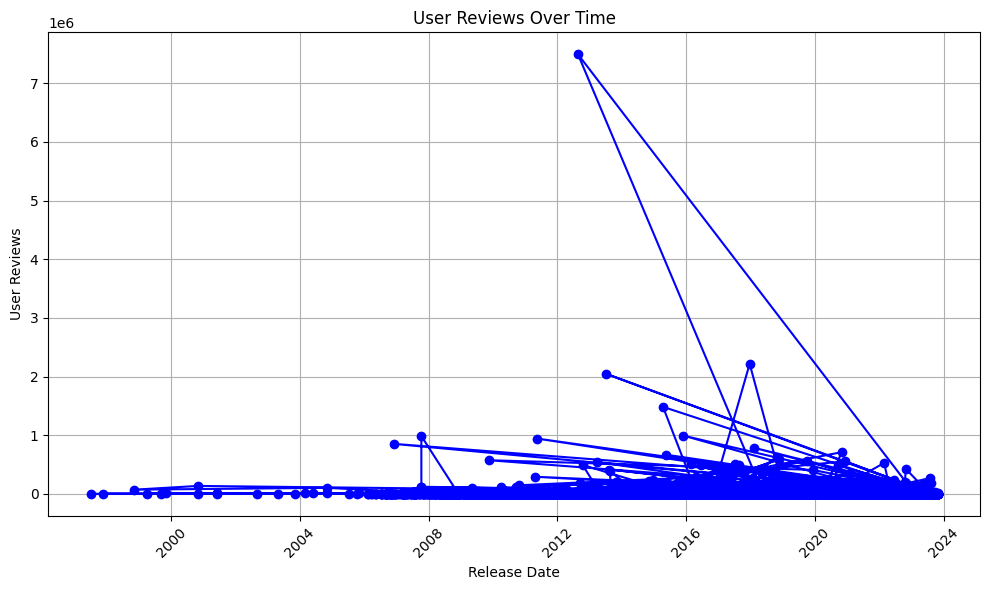

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df['date_release'], df['user_reviews'], marker='o', linestyle='-', color='b')
plt.title('User Reviews Over Time')
plt.xlabel('Release Date')
plt.ylabel('User Reviews')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

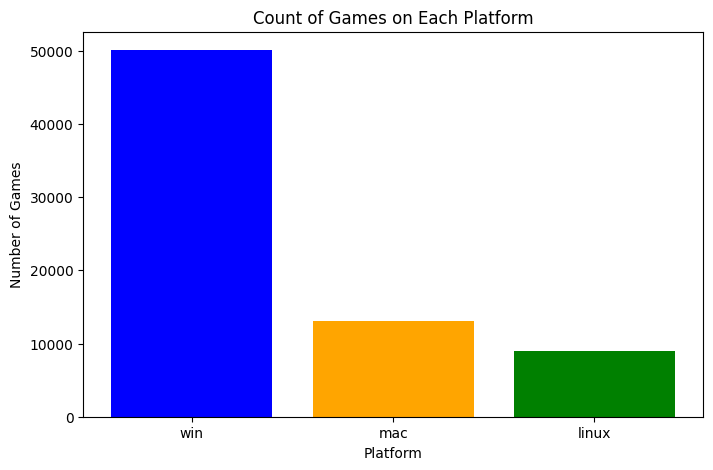

In [ ]:
platforms = ['win', 'mac', 'linux']
platform_counts = df[platforms].sum()

plt.figure(figsize=(8, 5))
plt.bar(platform_counts.index, platform_counts.values, color=['blue', 'orange', 'green'])
plt.title('Count of Games on Each Platform')
plt.xlabel('Platform')
plt.ylabel('Number of Games')
plt.show()


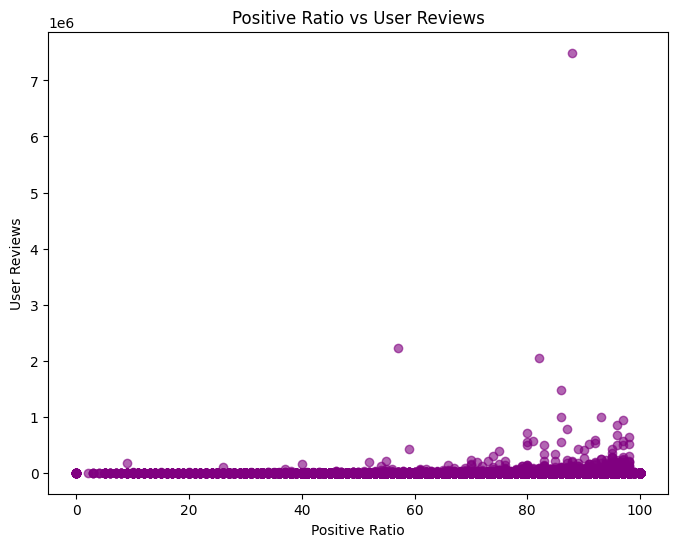

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['positive_ratio'], df['user_reviews'], alpha=0.6, color='purple')
plt.title('Positive Ratio vs User Reviews')
plt.xlabel('Positive Ratio')
plt.ylabel('User Reviews')
plt.show()

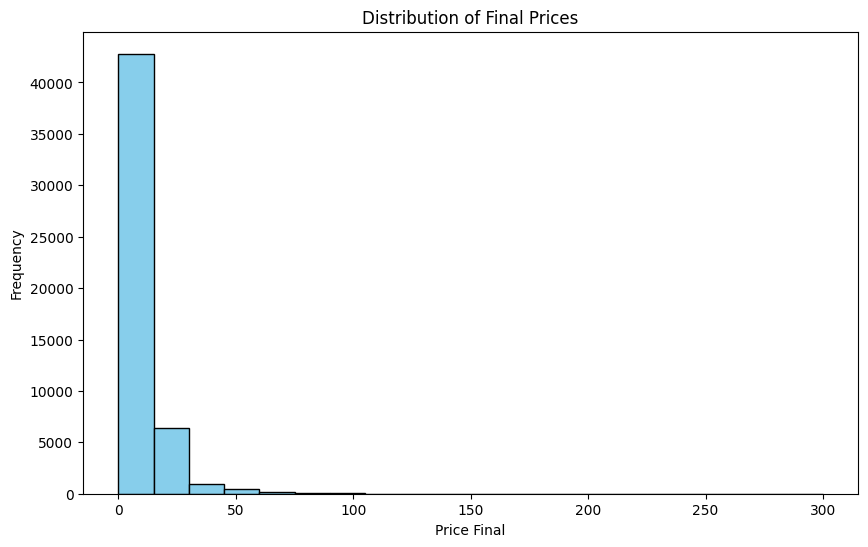

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['price_final'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Final Prices')
plt.xlabel('Price Final')
plt.ylabel('Frequency')
plt.show()


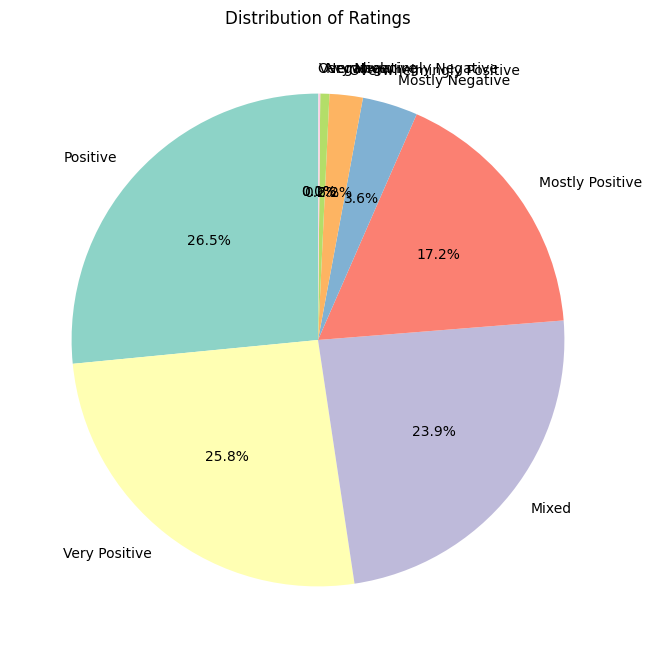

In [ ]:
rating_counts = df['rating'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(rating_counts)))
plt.title('Distribution of Ratings')
plt.show()


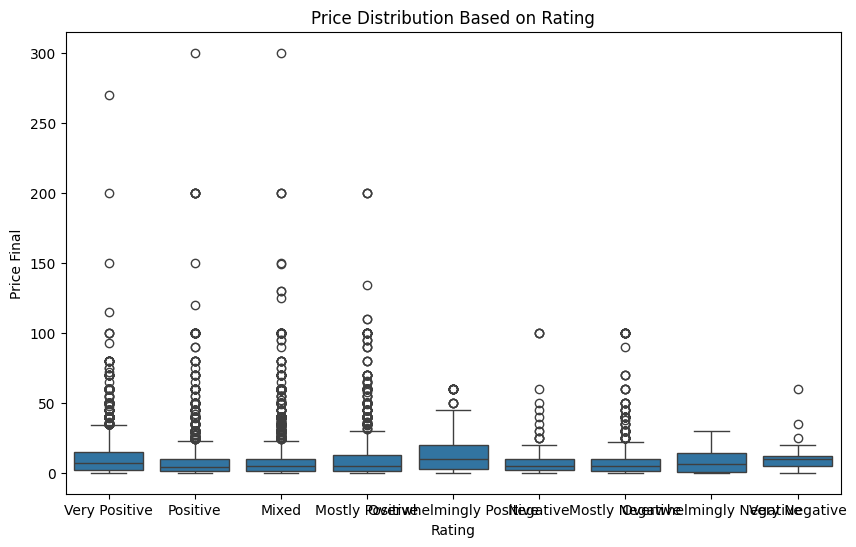

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', y='price_final', data=df)
plt.title('Price Distribution Based on Rating')
plt.xlabel('Rating')
plt.ylabel('Price Final')
plt.show()


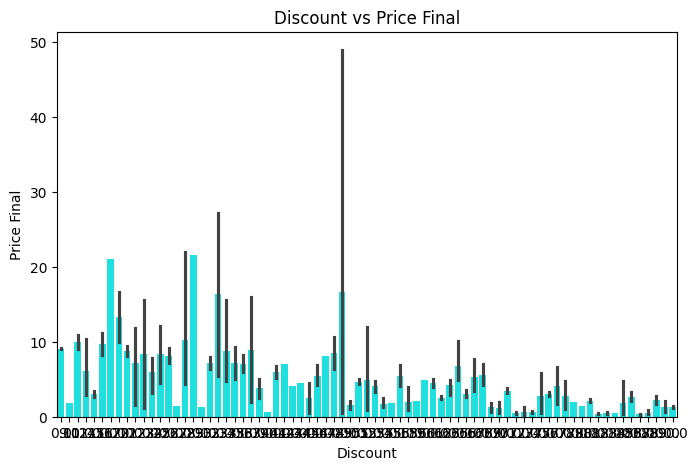

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x='discount', y='price_final', data=df, color='cyan')
plt.title('Discount vs Price Final')
plt.xlabel('Discount')
plt.ylabel('Price Final')
plt.show()


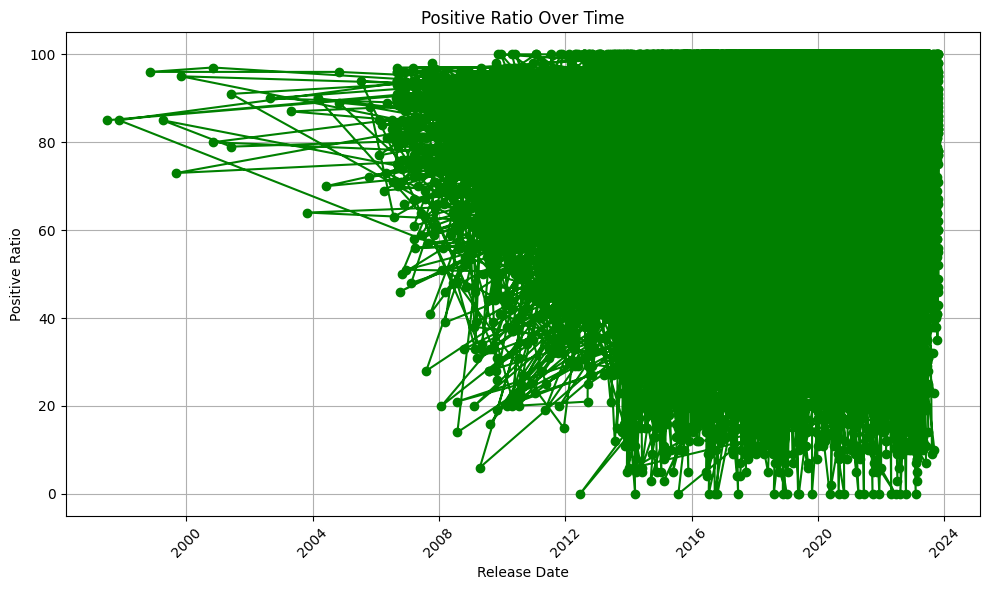

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df['date_release'], df['positive_ratio'], marker='o', linestyle='-', color='green')
plt.title('Positive Ratio Over Time')
plt.xlabel('Release Date')
plt.ylabel('Positive Ratio')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


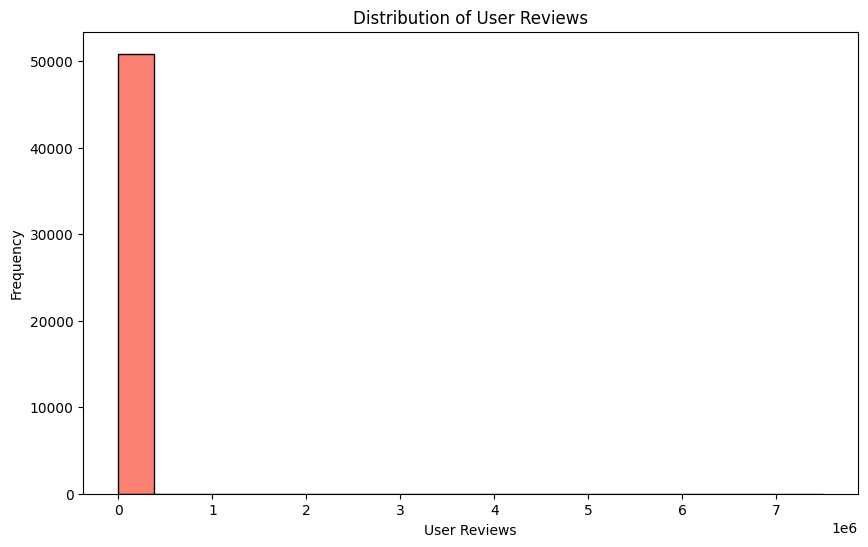

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['user_reviews'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of User Reviews')
plt.xlabel('User Reviews')
plt.ylabel('Frequency')
plt.show()


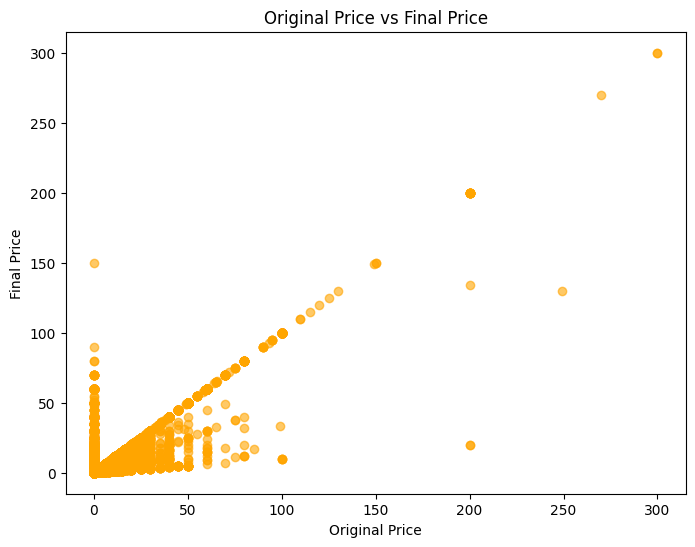

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['price_original'], df['price_final'], alpha=0.6, color='orange')
plt.title('Original Price vs Final Price')
plt.xlabel('Original Price')
plt.ylabel('Final Price')
plt.show()


# Seaborn

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
file_path = '/content/sample_data/games.csv'
df = pd.read_csv(file_path)

# Convert 'date_release' to datetime for plotting
df['date_release'] = pd.to_datetime(df['date_release'])


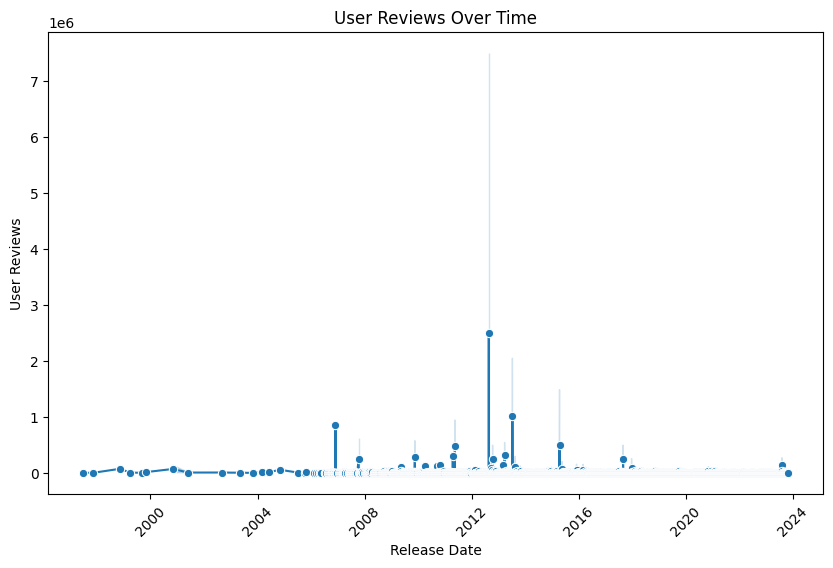

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='date_release', y='user_reviews', data=df, marker='o')
plt.title('User Reviews Over Time')
plt.xlabel('Release Date')
plt.ylabel('User Reviews')
plt.xticks(rotation=45)
plt.show()



<ipython-input-39-6f1c61b242a4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df, palette='Set2')


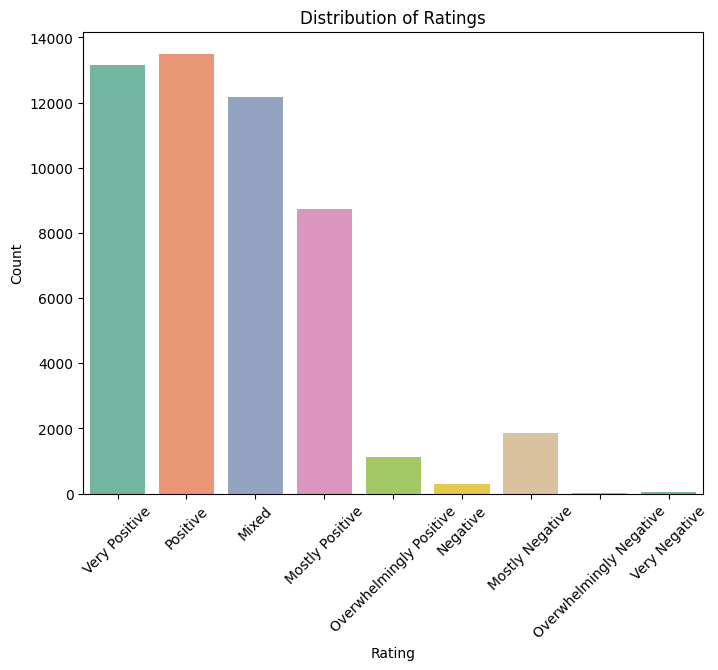

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=df, palette='Set2')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



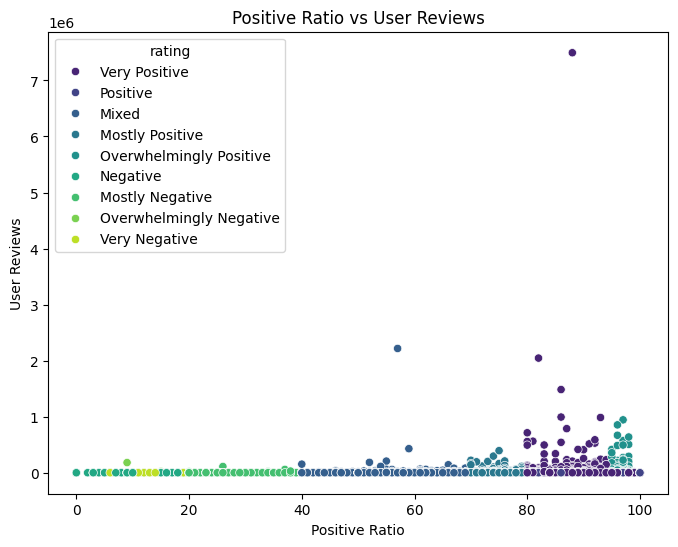

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='positive_ratio', y='user_reviews', data=df, hue='rating', palette='viridis')
plt.title('Positive Ratio vs User Reviews')
plt.xlabel('Positive Ratio')
plt.ylabel('User Reviews')
plt.show()



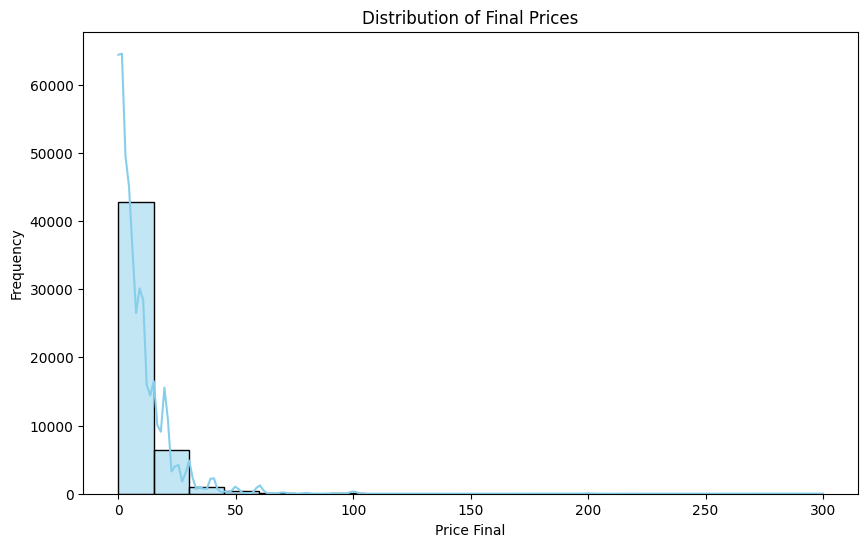

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price_final'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Final Prices')
plt.xlabel('Price Final')
plt.ylabel('Frequency')
plt.show()



<ipython-input-43-226ae2f880da>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='rating', y='price_final', data=df, palette='Set3')


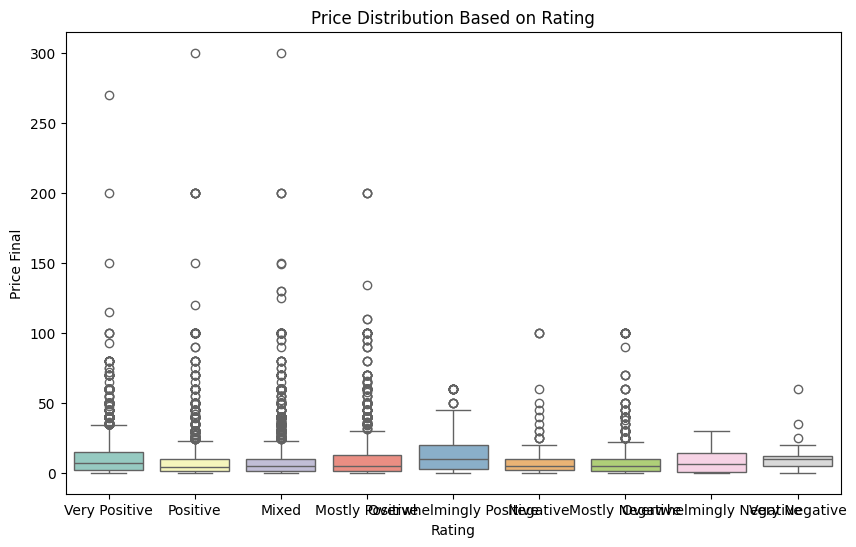

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', y='price_final', data=df, palette='Set3')
plt.title('Price Distribution Based on Rating')
plt.xlabel('Rating')
plt.ylabel('Price Final')
plt.show()



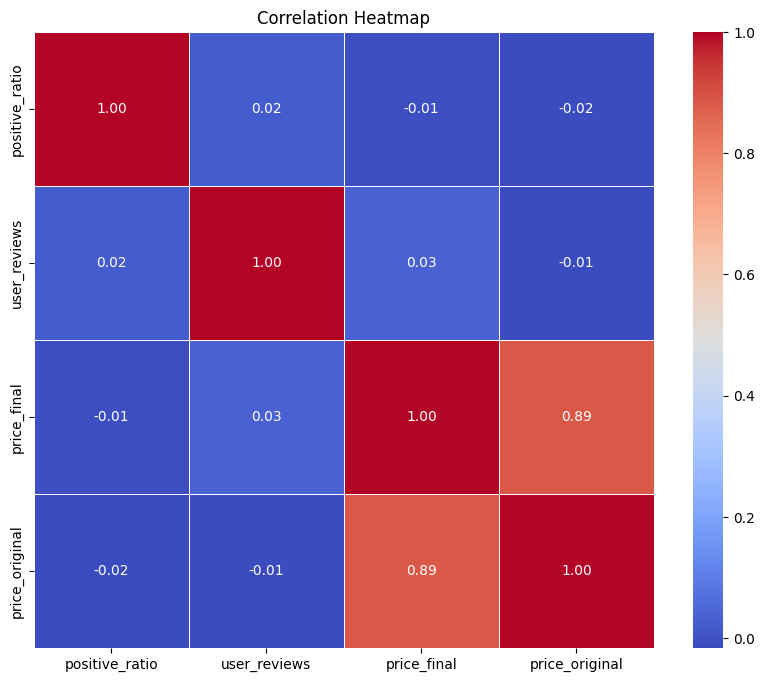

In [ ]:
plt.figure(figsize=(10, 8))
corr = df[['positive_ratio', 'user_reviews', 'price_final', 'price_original']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()



<ipython-input-45-9d75a2b56405>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='rating', y='price_final', data=df, palette='muted')


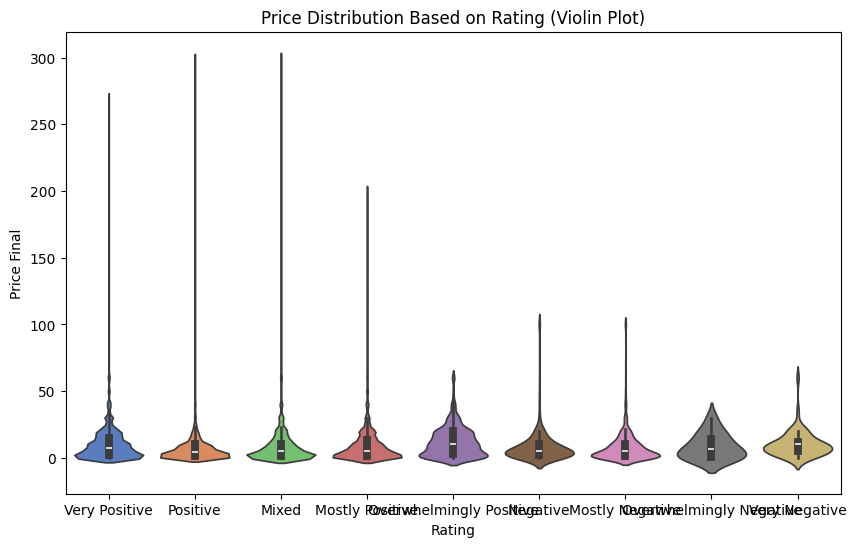

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='rating', y='price_final', data=df, palette='muted')
plt.title('Price Distribution Based on Rating (Violin Plot)')
plt.xlabel('Rating')
plt.ylabel('Price Final')
plt.show()



KeyError: 'rating'

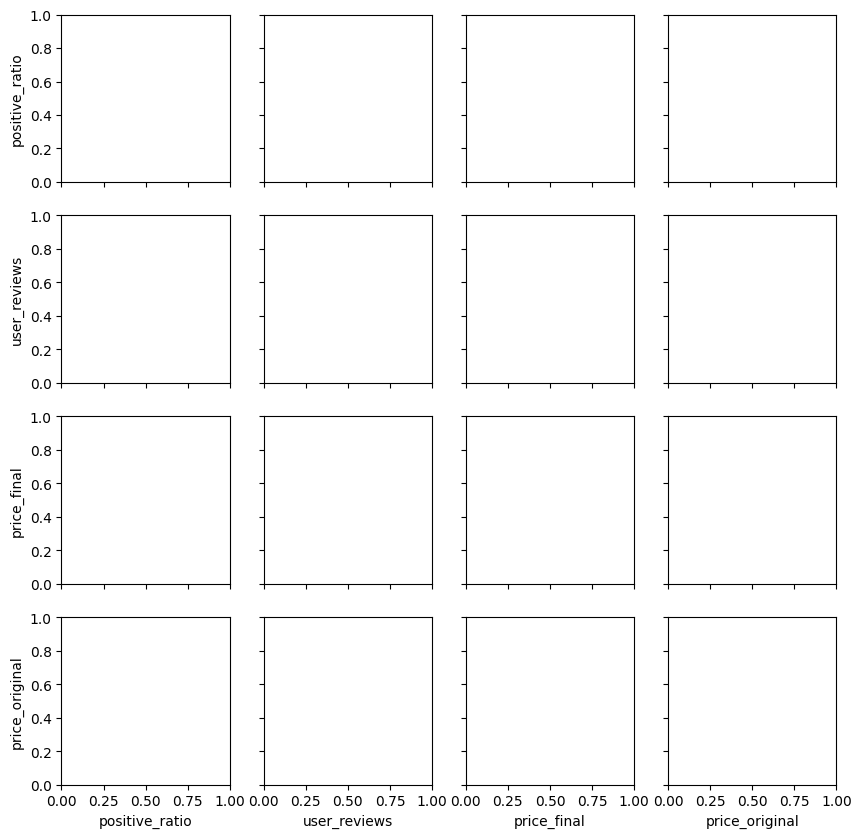

In [ ]:
sns.pairplot(df[['positive_ratio', 'user_reviews', 'price_final', 'price_original']], hue='rating', palette='Set1')
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()




<ipython-input-47-ee0409443714>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='discount', y='price_final', data=df, palette='Blues_d')


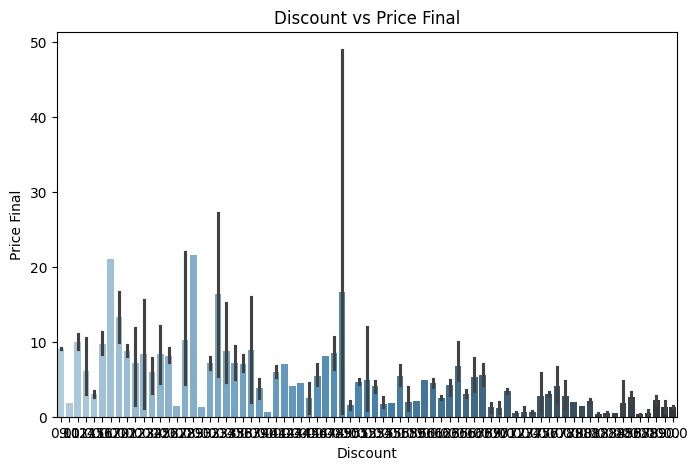

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x='discount', y='price_final', data=df, palette='Blues_d')
plt.title('Discount vs Price Final')
plt.xlabel('Discount')
plt.ylabel('Price Final')
plt.show()


<ipython-input-48-1e8a5198ccc7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='rating', y='user_reviews', data=df, jitter=True, palette='Set2')


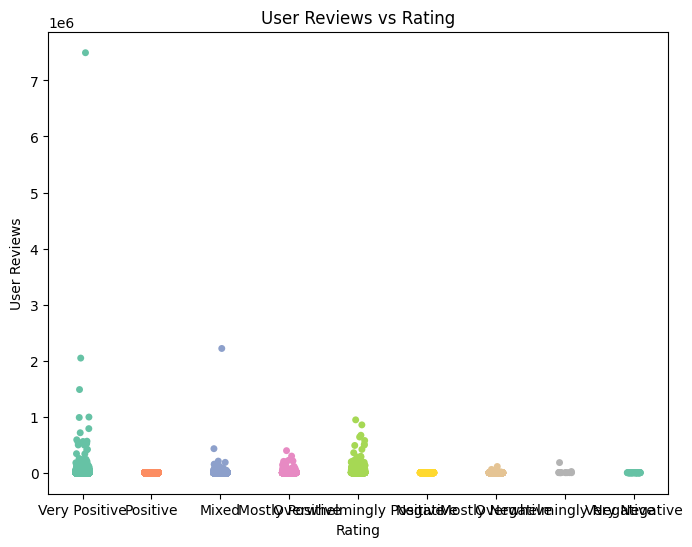

In [ ]:
plt.figure(figsize=(8, 6))
sns.stripplot(x='rating', y='user_reviews', data=df, jitter=True, palette='Set2')
plt.title('User Reviews vs Rating')
plt.xlabel('Rating')
plt.ylabel('User Reviews')
plt.show()


<ipython-input-49-1e8a5198ccc7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='rating', y='user_reviews', data=df, jitter=True, palette='Set2')


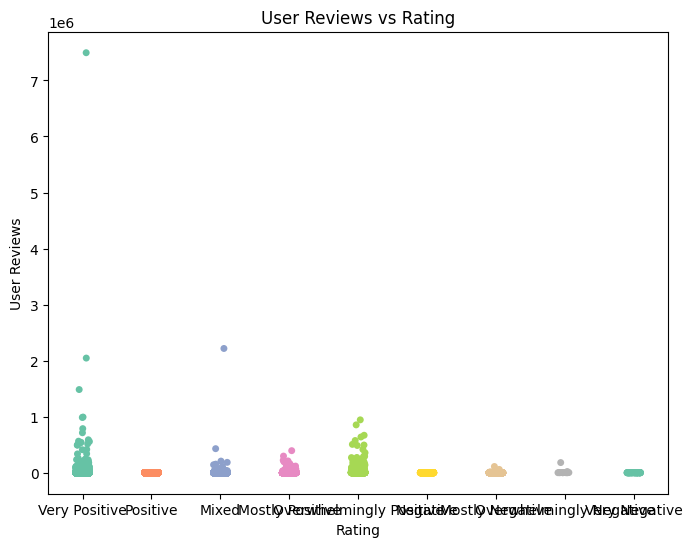

In [ ]:
plt.figure(figsize=(8, 6))
sns.stripplot(x='rating', y='user_reviews', data=df, jitter=True, palette='Set2')
plt.title('User Reviews vs Rating')
plt.xlabel('Rating')
plt.ylabel('User Reviews')
plt.show()
